# <span style="color:#1a73e8;"><strong>📘 Proyecto de Ciencia de Datos</strong></span>


Nataly Rodriguez Atehortua - nataly.rodriguez1@udea.edu.co

## <span style="color:#1a73e8;"><strong>Preparación de la fuente de datos y librerías</strong></span>

In [1]:
# librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
import warnings
import numpy as np
from sklearn.cluster import DBSCAN
from scipy.stats import zscore


## <span style="color:#1a73e8;"><strong>Descripción de la base de datos</strong></span>


<b> 1. Número de registros</b><br>

Este proyecto utiliza la base de datos **[Apnea-ECG](https://physionet.org/content/apnea-ecg/1.0.0/) [1]** disponible en PhysioNet. Esta base de datos recopila información de 8 registros con una duración entre 7 y 10 horas cada uno. Las señales disponibles incluyen:

- **ECG**
- **Saturación de oxígeno (SpO₂)**
- **Flujo oro-nasal** (medido mediante termistores)

Cada registro fue segmentado en épocas de 60 segundos, las cuales están etiquetadas según la presencia o ausencia de eventos respiratorios. Las etiquetas se codifican como:

- "A": presencia de un evento de apnea al inicio de la época.
- "N": ausencia de eventos de apnea.

Esta segmentación de 1 minuto, permite un análisis temporal consistente con los criterios diagnósticos estándar de la apnea obstructiva del sueño (≥10 segundos de cese respiratorio o reducción del flujo acompañada de desaturación ≥3%) [2].

<b> 2. Descripción de las señales.</b><br>

En la Figura 1 se presentan las señales de SpO2, flujo y ECG, junto con la detección de los picos R durante una época sin eventos de apnea (etiquetada como N). Por su parte, la Figura 2 muestra las mismas señales correspondientes a una época con eventos de apnea (etiquetada como A).

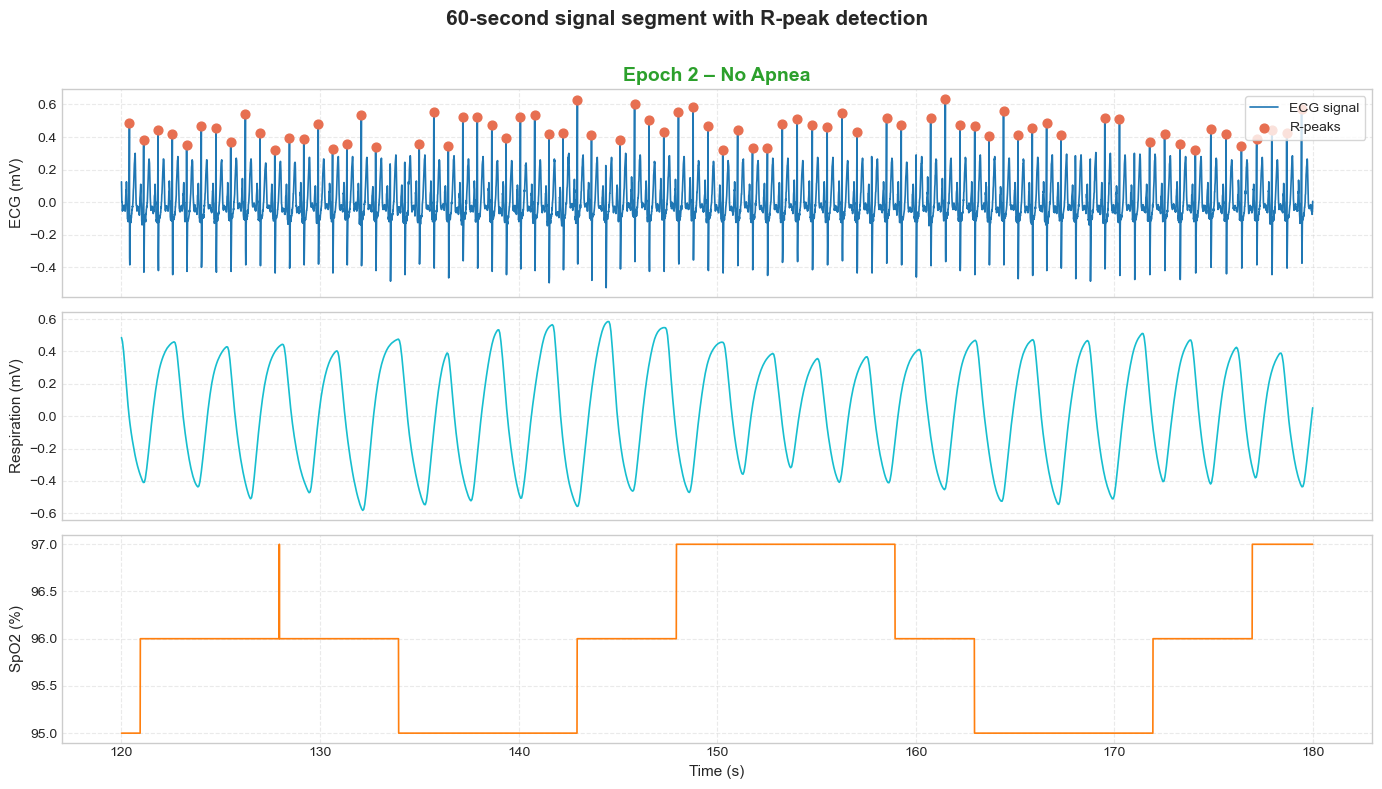

**Figura 1.** Época sin evento de apnea 

<br><br>

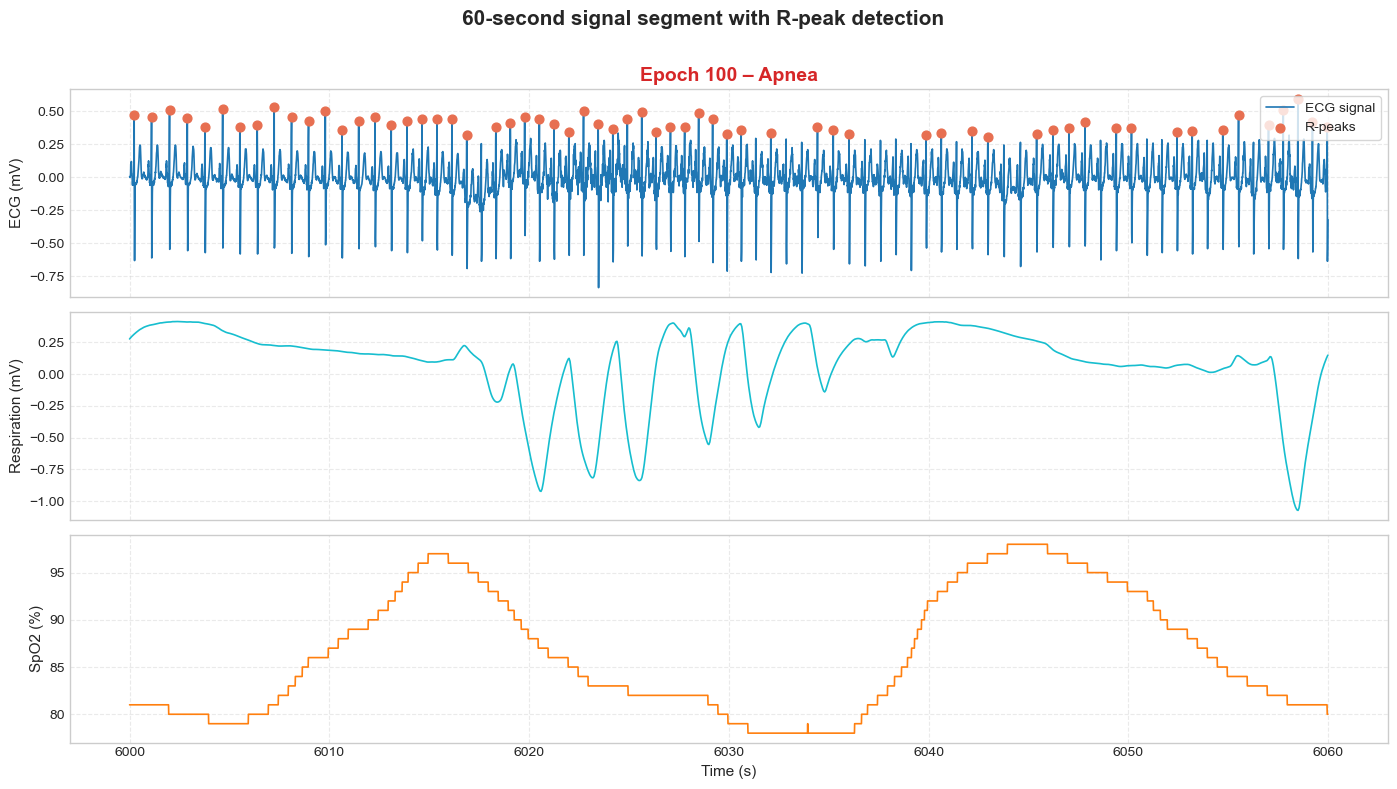

**Figura 2.** Época con evento de Apnea

En la figura correspondiente al evento de apnea (Figura 2) se observa una interrupción del flujo respiratorio, evidenciada por la ausencia de oscilaciones en la señal de flujo oro-nasal. Este patrón se asocia con una caída transitoria en la saturación de oxígeno (SpO₂), lo cual refleja la hipoxemia característica de los eventos apneicos. En contraste, la época sin evento (Figura 1) exhibe señales más estables, con variabilidad fisiológica normal y sin desaturaciones notorias.

<b> 3. Características extraídas.</b><br>

A partir de cada una de las señales segmentadas recopiladas en el DataSet, se extrajeron características relevantes en el dominio temporal y frecuencial:

### Señal ECG:
- **Dominio temporal**: promedio, mediana, varianza, RMSSD (raíz cuadrada de la media de las diferencias cuadráticas sucesivas), desviación estándar, varianza del cociente entre RR consecutivos

- **Dominio frecuencial (HRV)**: Razón entre las bandas de baja frecuencia (LF: 0.04–0.15 Hz) y alta frecuencia (HF: 0.15–0.40 Hz), expresada como LF/HF.

### Señal SpO₂:
- **Dominio temporal**: promedio, desviación estándar, varianza, valor mínimo y máximo por época.

### Señal de flujo respiratorio:
- **Dominio temporal**: promedio, mediana y desviación estándar.
- **Dominio frecuencial**: densidad espectral de potencia (PSD) y medias del espectro en los rangos 0–0.1 Hz y 0.4–0.5 Hz (`mean_PSD0_0.1` y `mean_PSD0.4_0.5`).

Todas las características extraídas por épocas de 60 segundos, junto con la información de género de los 8 sujetos, fueron consolidadas en un archivo `.csv` denominado **`features_with_metaData.csv`**. En este archivo:

- Cada **fila** corresponde a una época (minuto) de señal procesada.
- Cada **columna** representa una característica extraída.
- Se incluye una columna llamada **`subject`** que identifica a qué registro/sujeto pertenece cada muestra.
- Se añaden la columna **`sex`**, que indica el sexo de cada sujeto.
- Se añade la columna de **etiquetas (`label`)** proveniente de la base de datos original:
  - `"A"` indica que al inicio del minuto hay un evento de **apnea**.
  - `"N"` indica que **no** hay un evento de apnea.

### Distribución de clases:
- `N` (sin apnea): 2311 instancias  
- `A` (con apnea): 1587 instancias

### Total de características 

El dataset presentado contiene un total de **3.898 filas** y **20 variables (columnas)**.

<b> 4. Tipos de datos.</b><br>

### Tipos de datos por variable:
- **float64 (17 columnas):** Corresponden a las características extraídas de cada señal segmentada.  
- **object (3 columnas):** Incluyen:
  - `sex`: Género del sujeto.
  - `label`: Etiqueta que indica la presencia o ausencia de un evento de apnea.
  - `subject`: Identificador único del sujeto. 


<b> 5. Tabla descriptiva de las variables</b><br>

| Nombre de la variable | Tipo | Definición | Referencia |
|------------------------|-------|-------------|-------------|
| mean_rr | Numérica | Promedio de los intervalos RR en una época de 60 s; refleja el ritmo cardíaco promedio. | [3] |
| median_rr | Numérica | Mediana de los intervalos RR; representa el valor central del ritmo cardíaco y reduce la influencia de valores atípicos. | [3] |
| var_rr | Numérica | Varianza de los intervalos RR; cuantifica la dispersión estadística de los intervalos RR, reflejando la variabilidad del ritmo cardíaco | [3] |
| std_rr | Numérica | Desviación estándar de los intervalos RR; cuantifica la variabilidad general del ritmo cardíaco. | [3] |
| RMSSD | Numérica | Raíz cuadrada de la media de las diferencias cuadráticas sucesivas entre intervalos RR; índice sensible a la modulación parasimpática del corazón. | [3] |
| var_RR_ratio | Numérica | Varianza del cociente entre intervalos RR consecutivos; refleja la irregularidad o inestabilidad del ritmo cardíaco. | [4] |
| LF_HF_ratio | Numérica | Razón entre las potencias espectrales en bajas (0.04–0.15 Hz) y altas frecuencias (0.15–0.4 Hz); estima el equilibrio entre la actividad simpática y parasimpática. | [3] |
| mean_SpO2 | Numérica | Valor promedio de la saturación de oxígeno en la época. | [4] |
| std_SpO2 | Numérica | Desviación estándar de la SpO₂; refleja variabilidad de oxigenación. | [4] |
| var_SpO2 | Numérica | Varianza de la SpO₂; mide la dispersión de los valores de saturación. | [4] |
| min_SpO2 | Numérica | Valor mínimo de saturación de oxígeno. | [4] |
| max_SpO2 | Numérica | Valor máximo de saturación de oxígeno durante la época. | [4] |
| mean_flow | Numérica | Promedio del flujo oro-nasal; representa la ventilación media. | [5] |
| median_flow | Numérica | Mediana del flujo respiratorio; refleja el valor central del flujo | [5] |
| std_flow | Numérica | Desviación estándar del flujo respiratorio; indica variabilidad ventilatoria. | [5] |
| mean_PSD0_0.1 | Numérica | Media del espectro de potencia en el rango 0–0.1 Hz; asociada con respiración lenta o eventos apneicos. | [5] |
| mean_PSD0.4_0.5 | Numérica | Media del espectro de potencia en 0.4–0.5 Hz; representa ventilación normal y ciclos respiratorios regulares. | [5] |
| Sex | Categórica | Sexo biológico del sujeto (M/F). |  |
| label | Categórica | Etiqueta de clase: “A” (apnea) o “N” (normal). | |


En las señales analizadas se espera observar diferencias fisiológicas entre las épocas con y sin apnea. En cuanto a la variabilidad cardíaca, la varianza de los intervalos RR tiende a disminuir en los pacientes con apnea del sueño. No obstante, hacia el final de los episodios de apnea o hipopnea suele evidenciarse un incremento tanto en la potencia de baja frecuencia (LF) como en la potencia total (TF) del espectro de variabilidad de la frecuencia cardíaca, fenómeno asociado a la activación simpática y a la recuperación del ritmo respiratorio [6].

En el caso de la saturación de oxígeno (SpO₂), se observa una disminución progresiva durante los episodios de apnea o hipopnea, seguida de una recuperación. Este patrón refleja los ciclos repetitivos de desaturación y reoxigenación característicos del síndrome de apnea del sueño. Es importante destacar que la caída en la saturación no ocurre de forma inmediata tras el inicio del evento apneico, sino que presenta un retraso de aproximadamente 10 a 40 segundos, debido al tiempo fisiológico necesario para que los niveles de oxígeno en sangre arterial disminuyan de manera perceptible [7].

Asimismo, los eventos de apnea se caracterizan por disminuciones recurrentes del flujo respiratorio a lo largo de la noche. Este comportamiento fundamentó el proceso de extracción de características en el que se calcularon la media, la mediana y la desviación estándar como métricas en el dominio temporal. Adicionalmente, considerando que la señal de flujo respiratorio es inherentemente no estacionaria, se aplicó el método de Welch para estimar la densidad espectral de potencia (PSD), lo que permitió identificar los componentes frecuenciales asociados tanto a la respiración normal como a las alteraciones propias de los eventos de apnea [5].

In [2]:
# DataFrame 
df = pd.read_csv('../datos/features_with_metaData.csv')
df.head()

spo2_mean  spo2_std  spo2_var  spo2_min  spo2_max  airflow_mean  \
0  96.701000  1.695563  2.874932        93        98      0.030024   
1  97.350000  0.678602  0.460500        96        98      0.022421   
2  98.368667  0.773575  0.598418        97       100      0.037414   
3  99.000000  0.000000  0.000000        99        99      0.002367   
4  98.132833  0.426054  0.181522        97        99      0.020547   

   airflow_median  airflow_std  airflow_mean_PSD_0_0.1  \
0        0.057825     0.184668                0.041587   
1        0.026675     0.138686                0.020508   
2        0.113125     0.324112                0.235710   
3        0.009575     0.261016                0.106126   
4        0.058950     0.175053                0.076721   

   airflow_mean_PSD_0.4_0.5   mean_rr  median_rr    var_rr     rmssd  \
0                  0.005301  0.900000       0.90  0.003503  0.041658   
1                  0.009239  0.838714       0.84  0.002114  0.037879   
2                  0.003447  0.811644       0.80  0.006471  0.042525   
3                  0.007442  0.748101       0.76  0.003684  0.027712   
4                  0.005316  0.794667       0.79  0.002158  0.031365   

     std_rr  var_rr_ratio  hrv_lf_hf_ratio label subject Sex  
0  0.059186      0.002146         1.282583     N     a01   M  
1  0.045979      0.002096         1.238604     N     a01   M  
2  0.080444      0.002758         1.030521     N     a01   M  
3  0.060694      0.001384         2.982284     N     a01   M  
4  0.046457      0.001563         4.459743     N     a01   M

In [3]:
# --- DataFrame info ---
print("=== DataFrame Info ===")
df.info()

=== DataFrame Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3898 entries, 0 to 3897
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   spo2_mean                 3898 non-null   float64
 1   spo2_std                  3898 non-null   float64
 2   spo2_var                  3898 non-null   float64
 3   spo2_min                  3898 non-null   int64  
 4   spo2_max                  3898 non-null   int64  
 5   airflow_mean              3897 non-null   float64
 6   airflow_median            3897 non-null   float64
 7   airflow_std               3897 non-null   float64
 8   airflow_mean_PSD_0_0.1    3897 non-null   float64
 9   airflow_mean_PSD_0.4_0.5  3897 non-null   float64
 10  mean_rr                   3895 non-null   float64
 11  median_rr                 3895 non-null   float64
 12  var_rr                    3888 non-null   float64
 13  rmssd                     3888 non-null 

<b>Conteo de valores, tipos de datos y valores faltantes.</b><br>

In [4]:
# --- Valores Null por columna ---
print("\n=== Null Values per Column ===")
# Conteo de valores faltantes ordenado de mayor a menor
faltantes = df.isnull().sum().sort_values(ascending=False)

print("\nConteo de valores faltantes por variable:")
print(faltantes[faltantes > 0])


=== Null Values per Column ===

Conteo de valores faltantes por variable:
hrv_lf_hf_ratio             20
var_rr_ratio                17
std_rr                      10
var_rr                      10
rmssd                       10
mean_rr                      3
median_rr                    3
airflow_mean                 1
airflow_median               1
airflow_std                  1
airflow_mean_PSD_0_0.1       1
airflow_mean_PSD_0.4_0.5     1
dtype: int64


In [5]:
# --- Eliminación de todas las filas con valores faltantes ---
filas_antes = len(df)
df = df.dropna().reset_index(drop=True)
filas_despues = len(df)

print(f"\nSe eliminaron {filas_antes - filas_despues} filas con valores faltantes.")
print(f"Total de filas restantes: {filas_despues}")


Se eliminaron 23 filas con valores faltantes.
Total de filas restantes: 3875


In [6]:
# --- Eliminación de registros con SpO2 mínima igual a cero ---
filas_antes = len(df)
df = df[df["spo2_min"] > 0].reset_index(drop=True)
filas_despues = len(df)
print(f"\nSe eliminaron {filas_antes - filas_despues} filas donde SpO2_min = 0.")
print(f"Total de filas finales: {filas_despues}")


Se eliminaron 104 filas donde SpO2_min = 0.
Total de filas finales: 3771


### ***Análisis***

Teniendo en cuenta la presencia de valores nulos, y considerando que su cantidad máxima fue de 20 en un total de 3,898 filas, se decidió eliminarlos. De igual manera, se excluyeron los registros en los que la variable SpO2 min presentaba un valor de 0, ya que estos reflejan la desconexión del sensor de saturación de oxígeno durante la época correspondiente. Tras estas depuraciones, el análisis se realizará con un total de 3,771 filas de información, equivalentes a 3,771 épocas.

## <span style="color:#1a73e8;"><strong>Análisis descriptivo</strong></span>

In [7]:
# --- Estadísticas descriptiva ---
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)

desc_stats = df.describe()

# Coeficiente de variación
cv = desc_stats.loc['std'] / desc_stats.loc['mean']
cv.name = 'cv'

# Agregar a la tabla
desc_stats = pd.concat([desc_stats, cv.to_frame().T])

print("\n=== Descriptive Statistics with Coefficient of Variation ===")
display(desc_stats)


=== Descriptive Statistics with Coefficient of Variation ===


spo2_mean     spo2_std     spo2_var     spo2_min     spo2_max  \
count  3771.000000  3771.000000  3771.000000  3771.000000  3771.000000   
mean     91.331230     2.917324    19.481317    86.084858    95.747282   
std       5.954719     3.312619    40.839025    11.589404     2.866997   
min      52.468833     0.000000     0.000000     1.000000    74.000000   
25%      88.982000     0.464386     0.215655    79.000000    95.000000   
50%      94.432667     0.816496     0.666666    92.000000    96.000000   
75%      95.417250     5.401176    29.172725    95.000000    97.000000   
max      99.000000    34.221616  1171.119029    99.000000   100.000000   
cv        0.065199     1.135499     2.096317     0.134628     0.029943   

       airflow_mean  airflow_median  airflow_std  airflow_mean_PSD_0_0.1  \
count   3771.000000     3771.000000  3771.000000             3771.000000   
mean      -0.000259        0.008085     0.204341                0.034873   
std        0.049226        0.100956     0.092922                0.042868   
min       -0.131957       -0.192750     0.044301                0.000394   
25%       -0.044671       -0.083763     0.126152                0.005282   
50%       -0.026536       -0.018300     0.192582                0.017230   
75%        0.042859        0.090838     0.263032                0.051415   
max        0.159641        0.294750     0.605357                0.434127   
cv      -190.113665       12.486746     0.454740                1.229282   

       airflow_mean_PSD_0.4_0.5      mean_rr    median_rr       var_rr  \
count               3771.000000  3771.000000  3771.000000  3771.000000   
mean                   0.036317     0.991587     0.951721     0.317247   
std                    0.063843     0.346861     0.166248     6.770508   
min                    0.000075     0.628947     0.630000     0.000045   
25%                    0.005659     0.887463     0.840000     0.003128   
50%                    0.013642     0.963548     0.950000     0.009251   
75%                    0.034459     1.048214     1.040000     0.026439   
max                    0.617125    14.883333     4.615000   369.568689   
cv                     1.757958     0.349804     0.174682    21.341460   

             rmssd       std_rr  var_rr_ratio  hrv_lf_hf_ratio  
count  3771.000000  3771.000000   3771.000000      3771.000000  
mean      0.190547     0.174671      0.158883         2.860478  
std       0.728283     0.535549      2.264267         4.745052  
min       0.007022     0.006741      0.000077         0.000000  
25%       0.034876     0.055926      0.001310         0.757547  
50%       0.067835     0.096181      0.004429         1.621976  
75%       0.143198     0.162600      0.019350         3.466219  
max      28.744479    19.224169    108.705687       192.021985  
cv        3.822072     3.066054     14.251142         1.658832

### ***Análisis***

Se realizó un análisis descriptivo de las variables numéricas del conjunto de datos, evaluando tendencias centrales, dispersión y posibles valores atípicos. En términos generales, se observa que algunas variables presentan una alta variabilidad y valores extremos que exceden considerablemente la media, lo que podría reflejar episodios fisiológicos atípicos o errores puntuales en la medición.

Por ejemplo, la variable spo2_var muestra una media de 19.48 y un valor máximo de 1171.12, indicando una dispersión considerable en la variabilidad del nivel de saturación de oxígeno. Esto sugiere que algunas épocas presentan fluctuaciones extremas en SpO₂, aunque la mayoría de los valores se concentran en rangos fisiológicamente esperables.

De manera similar, varias características derivadas de los intervalos RR, como var_rr, rmssd y hrv_lf_hf_ratio, presentan valores máximos que superan ampliamente la media, reflejando distribuciones altamente asimétricas y la presencia de posibles valores atípicos.

En contraste, variables como spo2_mean, spo2_min y spo2_max muestran menor dispersión, con valores concentrados en rangos esperados para parámetros fisiológicos normales. 

Considerando los valores del coeficiente de variación, se observa que variables como spo2_mean y spo2_max presentan un CV bajo (≈ 0.03–0.06), indicando que la dispersión relativa es pequeña y los valores están bastante concentrados alrededor de la media. Otras variables, especialmente spo2_var, airflow_mean_PSD_0.4_0.5 y var_rr, airflow_median presentan CV altos (> 2), reflejando una dispersión relativa muy elevada y la presencia de valores extremos. También se presentan algunos CV negativos o extremadamente grandes (como en airflow_mean) debido a que la media de la variable está cercana a cero, lo que exagera la relación entre desviación estándar y media

## <span style="color:#1a73e8;"><strong> (EDA) Visualizaciones exploratorias</strong></span>


### ***Visualización variables numéricas agrupadas según el estado: Apnea (A) o Sin evento (N)***

In [8]:
def boxplots_por_caracteristica(df, features, group_col):
    
    # Copiar datos para no modificar el original
    data = df.copy()
    
    # Normalizar las características seleccionadas al rango [0, 1]
    scaler = MinMaxScaler()
    data[features] = scaler.fit_transform(data[features])
    
    data_long = data.melt(id_vars=group_col, value_vars=features,
                          var_name="Característica", value_name="Valor estandarizado")
    
    # Boxplot en un solo gráfico
    plt.figure(figsize=(10, 6))
    sns.boxplot(
        x="Característica", y="Valor estandarizado", hue=group_col,
        data=data_long, palette="pastel"
    )
    
    plt.title("Boxplots estandarizados por característica", fontsize=16, fontweight="bold")
    plt.xlabel("Características", fontsize=12)
    plt.ylabel("Valor estandarizado", fontsize=12)
    plt.xticks(rotation=30, ha="right")
    sns.despine()
    plt.legend(title=group_col, bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.grid(True)
    plt.show()

### <span style="color:#1a73e8;"><strong> ECG</strong></span>

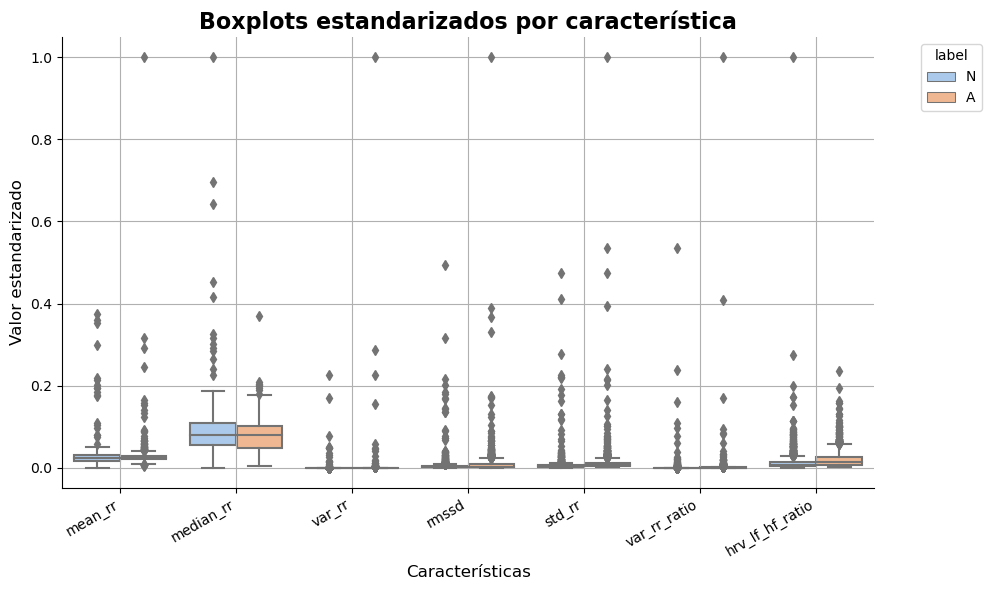

In [9]:
features = ['mean_rr','median_rr', 'var_rr','rmssd', 'std_rr', 'var_rr_ratio', 'hrv_lf_hf_ratio']  
boxplots_por_caracteristica(df, features, group_col="label")

### <span style="color:#1a73e8;"><strong>SPO2</strong></span>

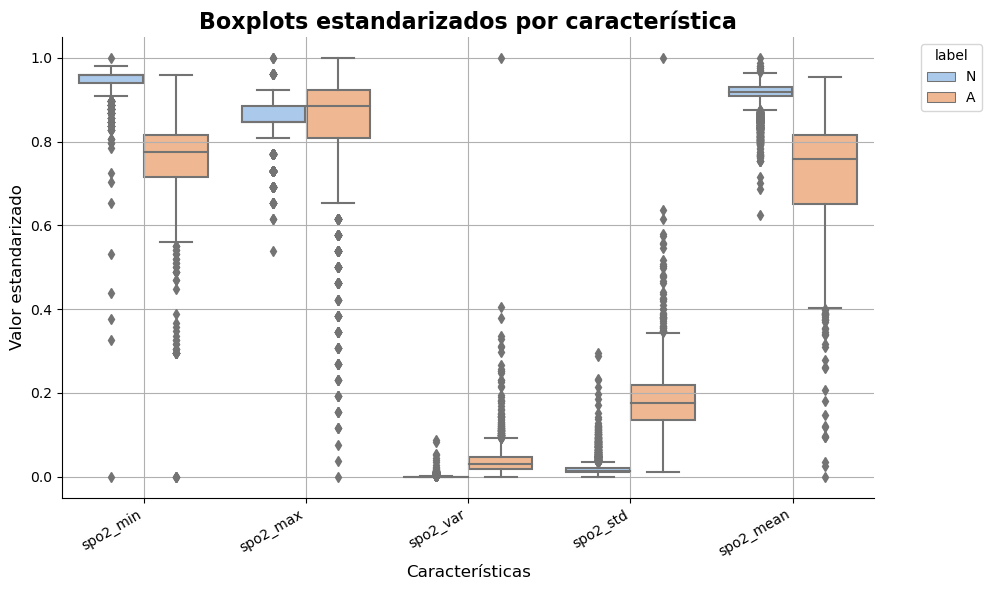

In [10]:
features = ['spo2_min','spo2_max','spo2_var','spo2_std','spo2_mean']  
boxplots_por_caracteristica(df, features, group_col="label")

### <span style="color:#1a73e8;"><strong>FLUJO</strong></span>

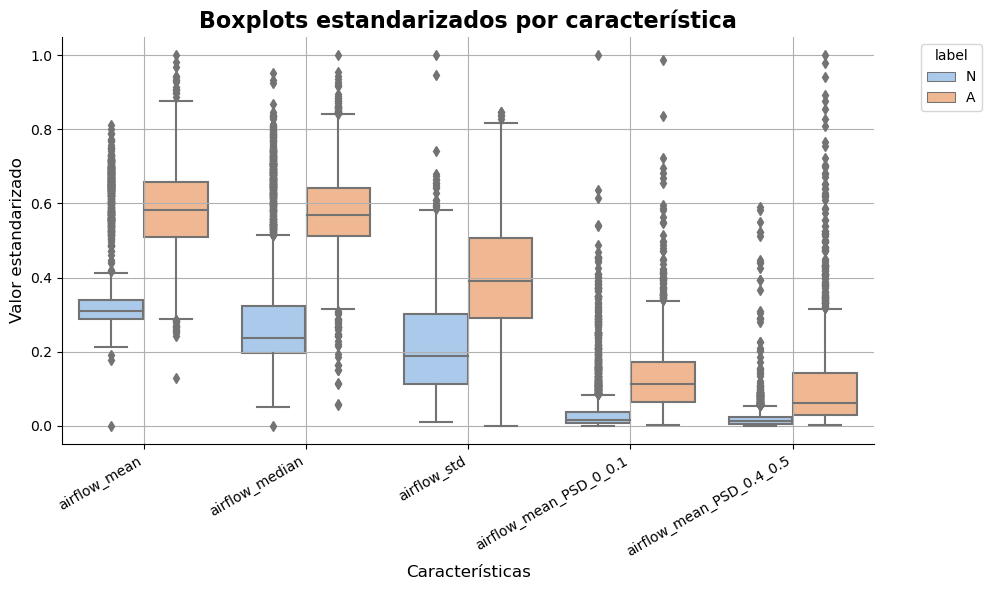

In [11]:
features = ['airflow_mean','airflow_median','airflow_std','airflow_mean_PSD_0_0.1','airflow_mean_PSD_0.4_0.5']  
boxplots_por_caracteristica(df, features, group_col="label")

#### ***Análisis***

Con el objetivo de analizar las variables por señal, se normalizó cada característica dentro de su respectivo grupo de señal y se dividieron los datos en los grupos de interés: apnea y no apnea. Para las características extraídas de la señal ECG mediante los picos R, se observa que la mediana, así como métricas de variabilidad como la varianza de los intervalos RR y el RMSSD, presentan valores bajos, sin diferencias apreciables entre los grupos. Además, se evidencia una presencia de numerosos valores atípicos, lo que podría reducir la sensibilidad de la mediana para reflejar diferencias entre condiciones. Estos resultados sugieren que, en este conjunto de datos, los episodios de apnea no generan cambios consistentes en las características del ritmo cardíaco, o que las variaciones fisiológicas asociadas se manifiestan de manera más sutil de lo que estas métricas permiten detectar.

En las características de SpO₂ se evidencian diferencias entre medianas. Para métricas como el valor mínimo y el promedio, se observa que la mediana es menor en las épocas con apnea en comparación con aquellas sin apnea, lo cual refleja la desaturación de oxígeno presente durante los eventos respiratorios. En contraste, las características que reflejan variabilidad, como la desviación estándar, presentan una mediana mayor en el grupo de épocas con apnea, debido a los cambios de desaturación y recuperación, mientras que en las épocas sin eventos estos valores se mantienen relativamente constantes. Para la característica del valor máximo, se observa una mayor dispersión en las épocas de apnea, aunque las medianas son similares entre ambos grupos, indicando que ambos tipos de épocas alcanzan valores máximos comparables.

En la señal de flujo respiratorio, las medianas de las características evaluadas son mayores en el grupo con apnea. Este aumento se explica porque, durante los eventos apneicos, el flujo permanece la mayor parte del tiempo en valores cercanos a cero, generando una concentración de puntos positivos en torno a ese nivel y desplazando las métricas de tendencia central hacia valores más altos. Por otro lado, las métricas asociadas a la variabilidad, como la desviación estándar, y las componentes espectrales en los rangos de 0–0.1 Hz y 0.4–0.5 Hz presentan valores mayores en las épocas con apnea. Esto refleja las fluctuaciones de flujo generadas por el cese y la posterior recuperación respiratoria, donde el esfuerzo inspiratorio compensatorio produce oscilaciones más marcadas en la señal. En contraste, durante las épocas sin eventos respiratorios, el flujo se mantiene más estable y dentro de un rango acotado (aproximadamente entre -0.6 y 0.6), reflejando un patrón respiratorio continuo

### ***Visualización de variables categóricas: sexo y etiqueta (Label)***

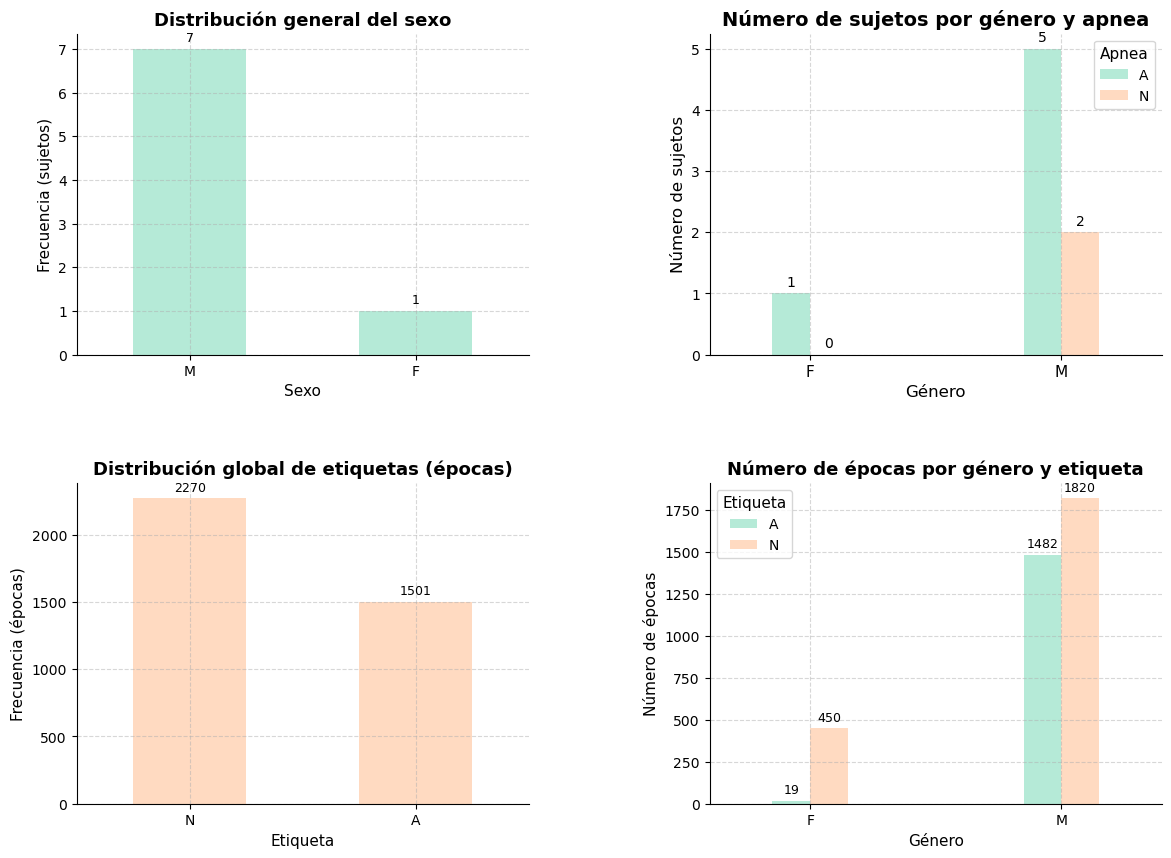

In [12]:
# --- Columnas relevantes ---
id_col = 'subject'
category_col = 'Sex'
label_col = 'label'

# --- Asegurar un registro único por sujeto ---
df_unique = df.drop_duplicates(subset=id_col)

# --- Clasificar cada sujeto según si tuvo al menos una apnea ---
subject_labels = (
    df.groupby(id_col)[label_col]
    .apply(lambda x: 'A' if (x == 'A').any() else 'N')
    .reset_index()
    .rename(columns={label_col: 'subject_label'})
)

# --- Unir con información de sexo ---
df_subject = pd.merge(df_unique[[id_col, category_col]], subject_labels, on=id_col, how='left')

# --- Conteos por sexo y presencia de apnea (por sujeto) ---
df_counts_subjects = df_subject.groupby([category_col, 'subject_label']).size().unstack(fill_value=0)

# --- Conteo general de sexo (por sujeto) ---
df_sex = df_subject[category_col].value_counts()

# --- Conteo de épocas por género ---
df_counts_epochs = df.groupby([category_col, label_col]).size().unstack(fill_value=0)

# --- Conteo global de etiquetas ---
df_labels = df[label_col].value_counts()

# --- Paleta de colores pastel ---
colors = ["#b5ead7", "#ffdac1"]

# --- Crear figura: 2x2 ---
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
ax1, ax2, ax3, ax4 = axes.flatten()
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# --- Gráfico 1: distribución general de sexo ---
df_sex.plot(kind='bar', color="#b5ead7", ax=ax1, width=0.5)
ax1.set_title("Distribución general del sexo", fontsize=13, fontweight="bold")
ax1.set_xlabel("Sexo", fontsize=11)
ax1.set_ylabel("Frecuencia (sujetos)", fontsize=11)
ax1.set_xticklabels(df_sex.index, rotation=0, fontsize=10)
for container in ax1.containers:
    ax1.bar_label(container, fmt="%d", fontsize=9, padding=3)

# --- Gráfico 2: sujetos por género y apnea ---
df_counts_subjects.plot(kind='bar', width=0.3, color=colors, ax=ax2)
ax2.set_title("Número de sujetos por género y apnea", fontsize=14, fontweight="bold")
ax2.set_xlabel("Género", fontsize=12)
ax2.set_ylabel("Número de sujetos", fontsize=12)
ax2.set_xticklabels(df_counts_subjects.index, rotation=0, fontsize=11)
ax2.legend(title="Apnea", fontsize=10, title_fontsize=11)
for container in ax2.containers:
    ax2.bar_label(container, fmt="%d", fontsize=10, padding=3)

# --- Gráfico 3: distribución global de etiquetas ---
df_labels.plot(kind='bar', color="#ffdac1", ax=ax3, width=0.5)
ax3.set_title("Distribución global de etiquetas (épocas)", fontsize=13, fontweight="bold")
ax3.set_xlabel("Etiqueta", fontsize=11)
ax3.set_ylabel("Frecuencia (épocas)", fontsize=11)
ax3.set_xticklabels(df_labels.index, rotation=0, fontsize=10)
for container in ax3.containers:
    ax3.bar_label(container, fmt="%d", fontsize=9, padding=3)

# --- Gráfico 4: número de épocas por género y etiqueta ---
df_counts_epochs.plot(kind='bar', width=0.3, color=colors, ax=ax4)
ax4.set_title("Número de épocas por género y etiqueta", fontsize=13, fontweight="bold")
ax4.set_xlabel("Género", fontsize=11)
ax4.set_ylabel("Número de épocas", fontsize=11)
ax4.set_xticklabels(df_counts_epochs.index, rotation=0, fontsize=10)
ax4.legend(title="Etiqueta", fontsize=10, title_fontsize=11)
for container in ax4.containers:
    ax4.bar_label(container, fmt="%d", fontsize=9, padding=3)


# --- Mejorar estética para todos los ejes ---
for ax in [ax1, ax2, ax3, ax4]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(visible=True, linestyle='--', alpha=0.5)

plt.show()

#### ***Análisis***

Al analizar las variables categóricas género y etiqueta (label), se observa que de los ocho sujetos evaluados, siete corresponden al género masculino y uno al femenino, evidenciando un sesgo de distribución por género en la muestra. Entre los registros masculinos, cinco presentan al menos un evento de apnea, mientras que dos no registran eventos respiratorios. Por su parte, el registro femenino muestra la presencia de eventos de apnea.

En cuanto a las épocas, se identifican 2,270 sin eventos de apnea y 1,501 con eventos respiratorios. Desglosando por género, el registro de la mujer cuenta con 450 épocas sin apnea y 19 con eventos, mientras que los registros masculinos presentan un total de 1,820 épocas sin eventos respiratorios y 1,482 con eventos.

### ***Distribución y variabilidad de las variables cuantitativas según etiqueta (Label)***

In [13]:
def plot_variable_by_group(df, features, group_col, signal, num_bins=20):
    """
    Genera histogramas y boxplots para cada variable numérica,
    agrupados por una columna categórica.
    
    Parámetros:
    ------------
    df : pd.DataFrame
        DataFrame con los datos.
    features : list
        Lista de nombres de columnas numéricas a graficar.
    group_col : str
        Nombre de la columna categórica para agrupar.
   
    """

    warnings.simplefilter(action='ignore', category=FutureWarning)

    # Crear mapa de colores 
    grupos_unicos = df[group_col].dropna().unique()
    colores_defecto = ["#A8E6CF", "#FFD3B6", "#FFAAA5", "#D5AAFF"]
    color_map = {grupo: colores_defecto[i % len(colores_defecto)] for i, grupo in enumerate(grupos_unicos)}

    # Título general
    print(f"\n\033[1mDISTRIBUCIÓN Y VARIABILIDAD DE LAS VARIABLES {signal} POR {group_col.upper()}\033[0m\n")

    # Graficar cada variable
    for col in features:

        fig, axes = plt.subplots(
            nrows=2,
            sharex=True,
            gridspec_kw={"height_ratios": [0.5, 1]},
            figsize=(10, 6)
        )

        # --- Boxplot (arriba) ---
        sns.boxplot(
            x=col,
            y=group_col,
            data=df,
            ax=axes[0],
            hue=group_col,
            palette=color_map,
            width=0.5,
            flierprops={'marker': 'o', 'color': 'black'},
            dodge=True
        )
        axes[0].set_ylabel("")
        axes[0].legend_.remove() if axes[0].get_legend() else None
        axes[0].grid(True, linestyle='--', alpha=0.6)

        # --- Histograma (abajo) ---
        sns.histplot(
            data=df,
            x=col,
            bins=num_bins,
            hue=group_col,
            palette=color_map,
            alpha=0.7,
            ax=axes[1],
            kde=True
        )
        axes[1].set_title(f"Distribución de {col} por {group_col}", fontsize=14, fontweight="bold")
        axes[1].set_xlabel("Valor", fontsize=12)
        axes[1].set_ylabel("Frecuencia", fontsize=12)
        axes[1].grid(True, linestyle='--', alpha=0.6)

        # Ajustar diseño
        sns.despine(left=True)
        plt.tight_layout()
        plt.show()

### <span style="color:#1a73e8;"><strong> ECG</strong></span>


DISTRIBUCIÓN Y VARIABILIDAD DE LAS VARIABLES ECG POR LABEL



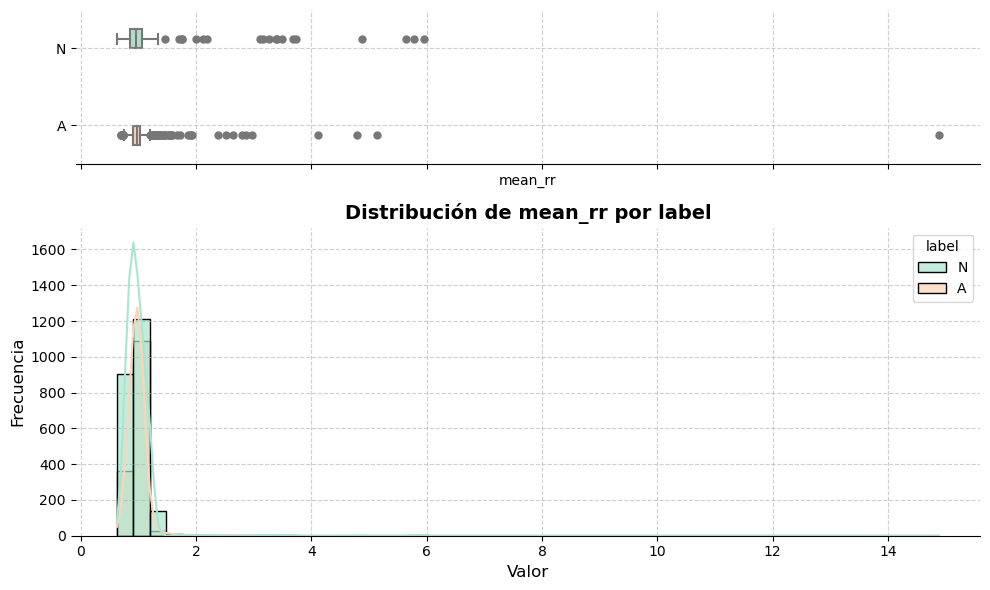

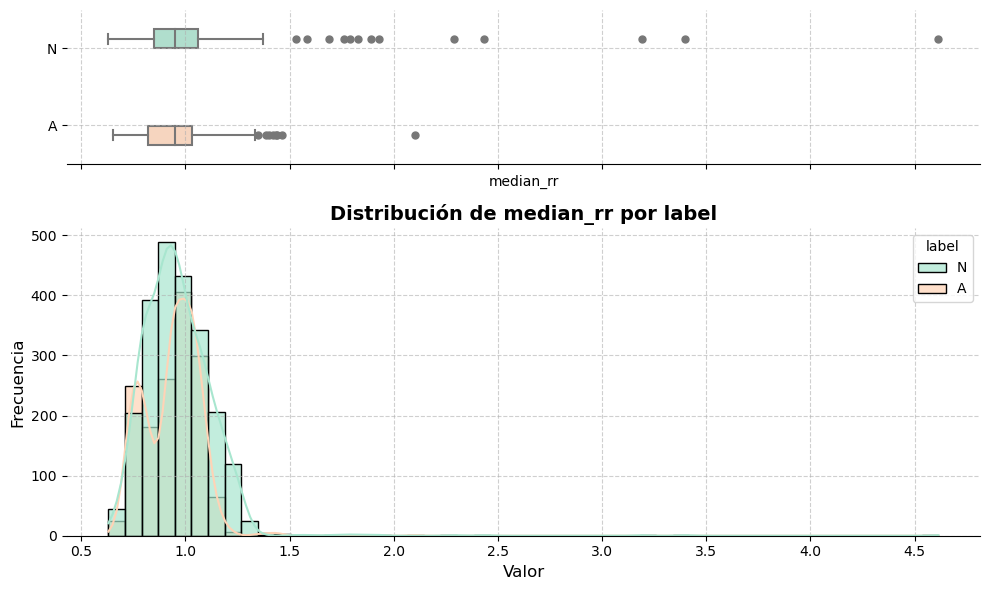

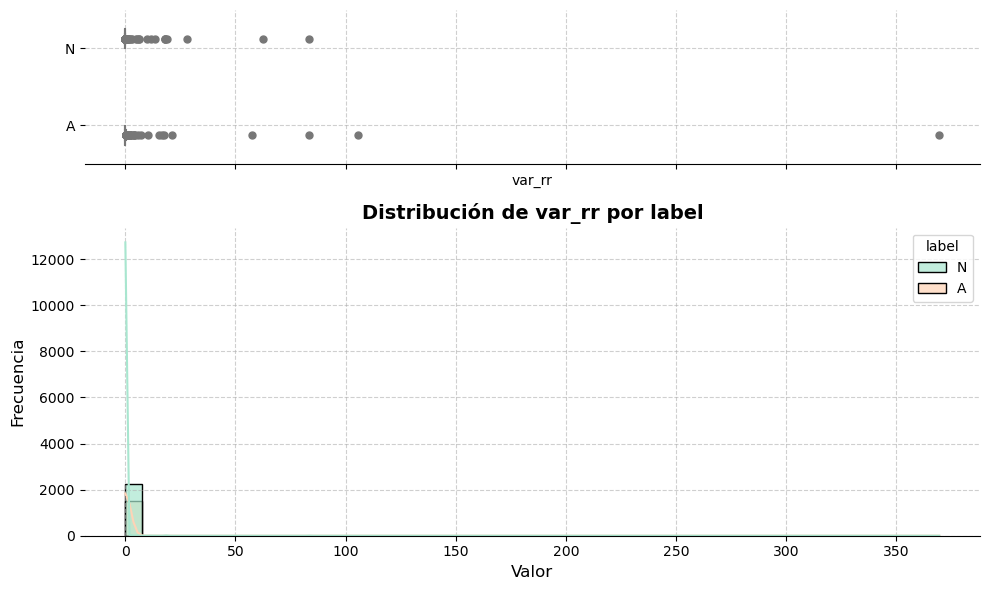

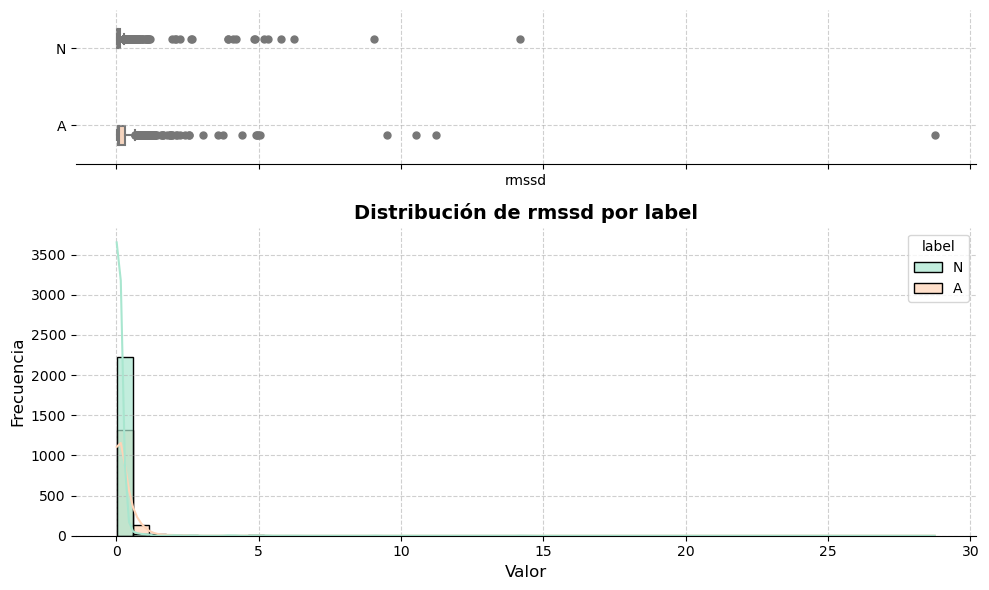

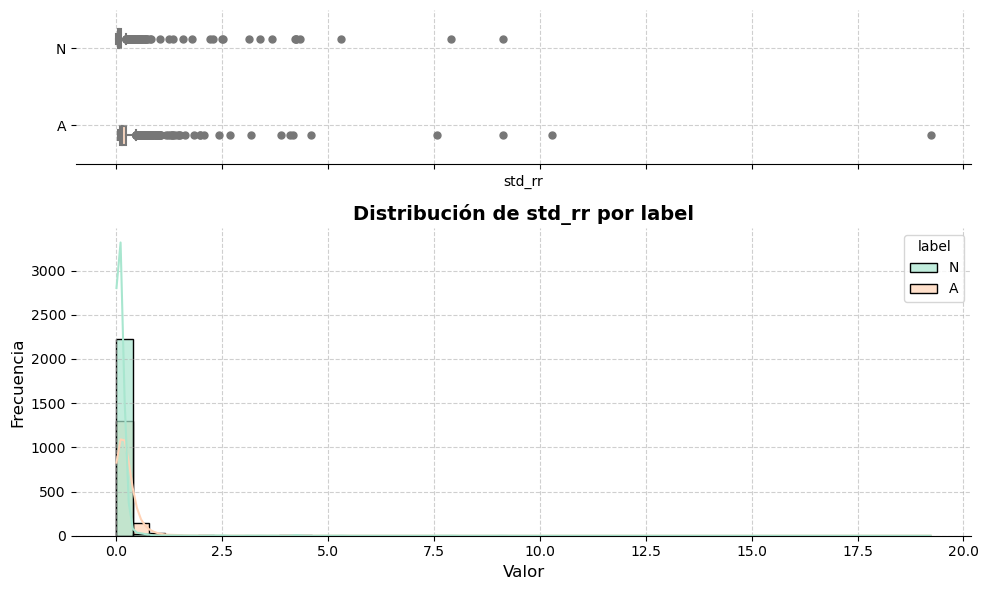

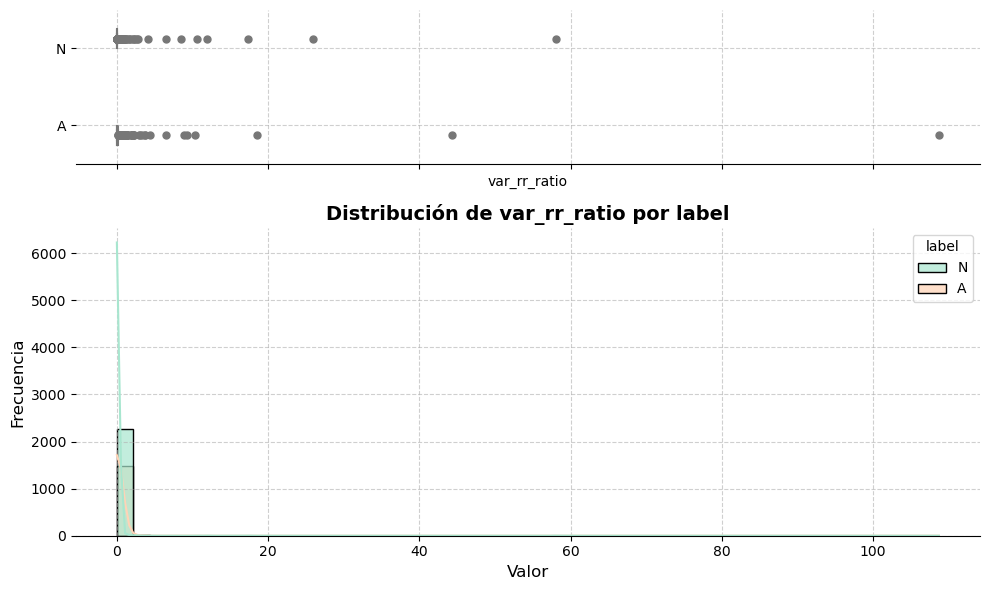

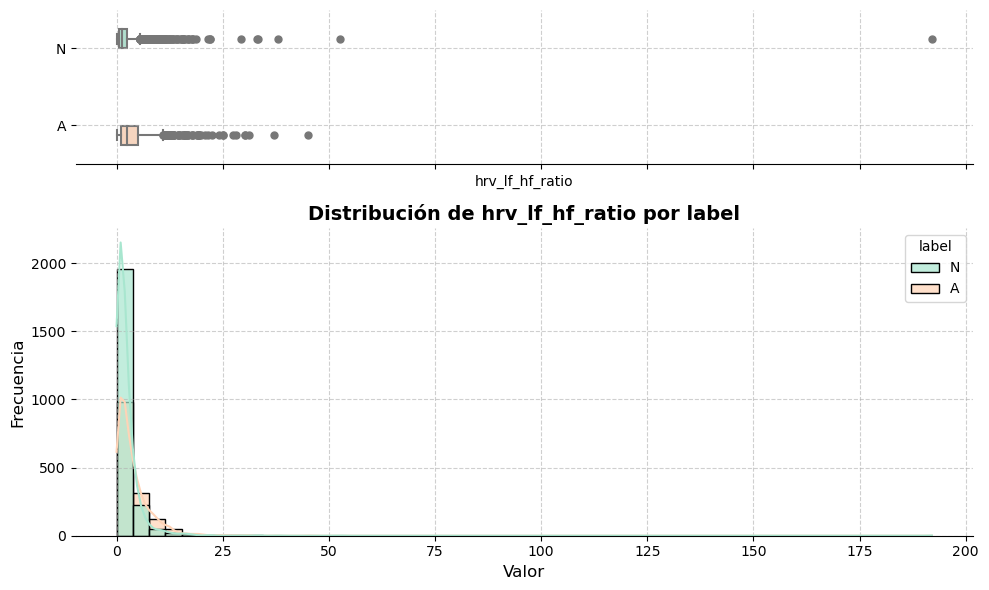

In [14]:
features = ['mean_rr','median_rr', 'var_rr','rmssd', 'std_rr', 'var_rr_ratio', 'hrv_lf_hf_ratio']  

plot_variable_by_group(df, features,'label', 'ECG', num_bins=50)

#### ***Análisis***

En el análisis bivariado de la señal de ECG se examinaron las características derivadas de los intervalos RR en relación con la variable de etiqueta (épocas con y sin eventos de apnea). Estas métricas se estimaron a partir de los picos R detectados mediante el algoritmo find_peaks. Este método permitió identificar la mayoría de los picos R presentes en la señal, como se ilustra en las Figuras 1 y 2; sin embargo, algunos picos de baja amplitud no fueron detectados, lo que representa una limitación en segmentos con morfología atenuada o baja relación señal-ruido.

A partir de los picos identificados, las medidas de tendencia central del intervalo RR, como mean_rr y median_rr, se concentraron alrededor de 1 s, correspondiente a una frecuencia cardíaca aproximada de 60 latidos por minuto, valor esperado durante el sueño. En condiciones fisiológicas normales, el intervalo R-R oscila entre 0.6 y 1 s, lo que equivale a una frecuencia cardíaca de 60 a 100 latidos por minuto [9]. Esta concordancia indica que la señal se mantiene fisiológicamente estable tanto en épocas con apnea como sin eventos respiratorios, lo que sugiere una adecuada calidad del registro y la ausencia de artefactos relevantes en la mayoría de los segmentos.

Por otro lado, las características de variabilidad, como var_rr, sd_rr y var_rr_ratio, muestran concentraciones cercanas a cero en ambos grupos, lo que indica que las diferencias entre intervalos consecutivos son pequeñas en general. Este patrón sugiere que, aunque los eventos de apnea pueden inducir variaciones puntuales, la señal de ECG mantiene estabilidad en sus oscilaciones globales y la variabilidad extrema es limitada.

En cuanto a las características espectrales, como hrv_lf_hf_ratio, los valores se concentran principalmente en rangos bajos, especialmente en torno a cero, en ambos grupos. Esto refleja un predominio relativo de las frecuencias bajas de la señal, que puede asociarse con la influencia parasimpática durante el sueño, y que no se ve alterada de manera significativa en el promedio por la presencia de apneas.

En conjunto, los resultados indican que las amplitudes de la señal RR se mantienen consistentes entre épocas con y sin apnea, mientras que la variabilidad de la señal y las relaciones espectrales presentan cambios leves.

### <span style="color:#1a73e8;"><strong>SPO2</strong></span>


DISTRIBUCIÓN Y VARIABILIDAD DE LAS VARIABLES SPO2 POR LABEL



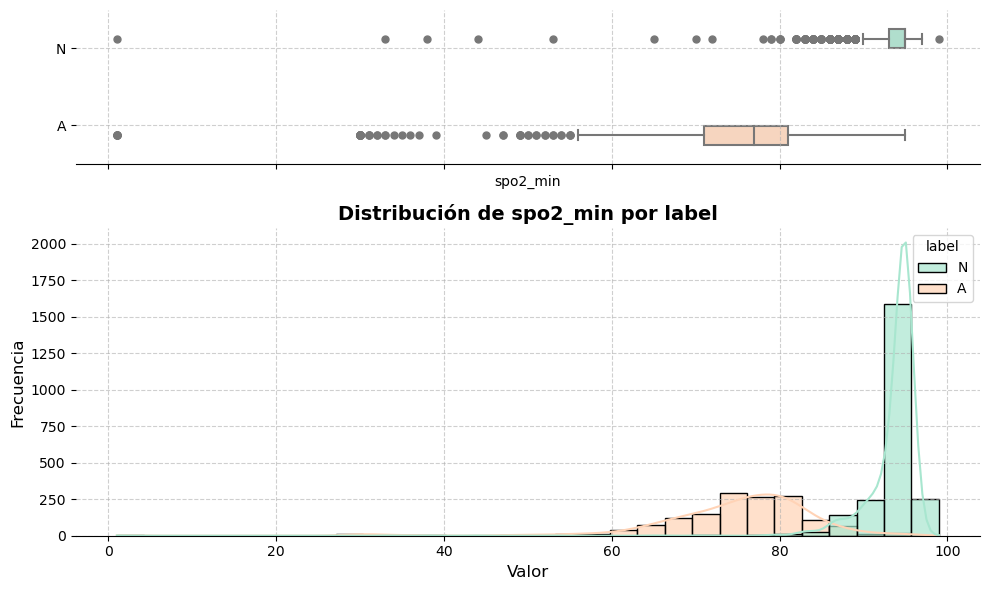

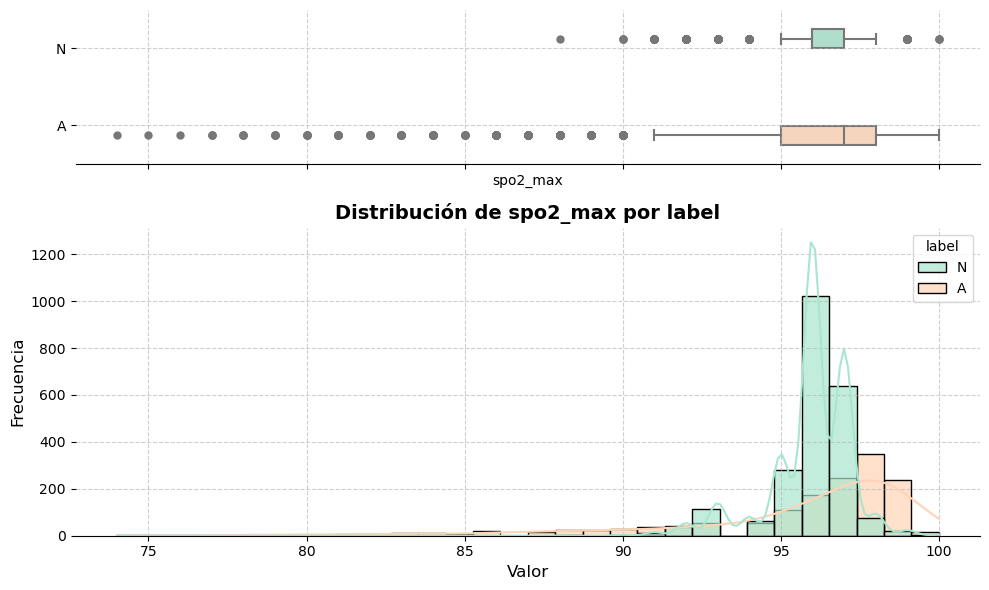

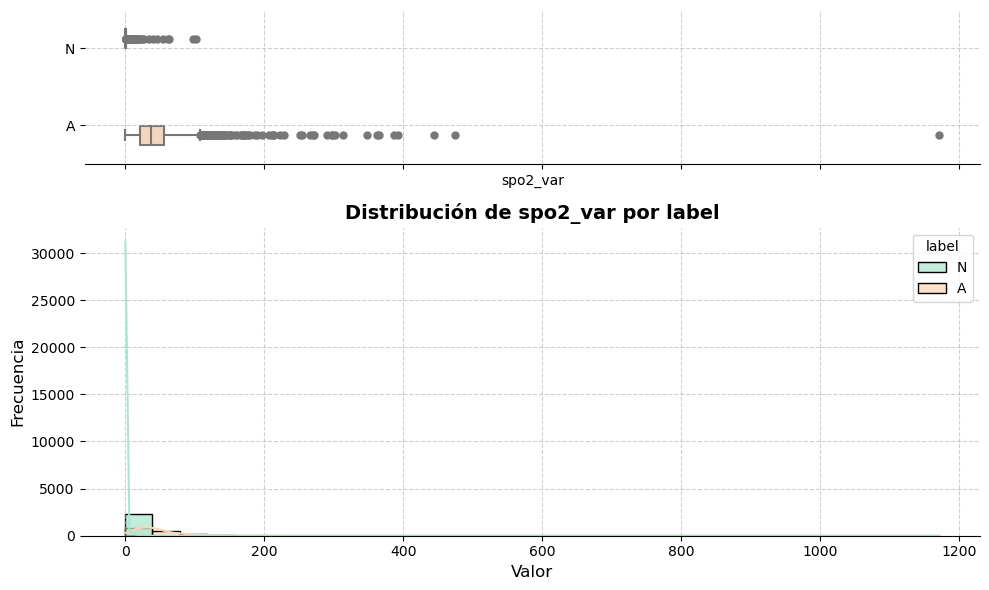

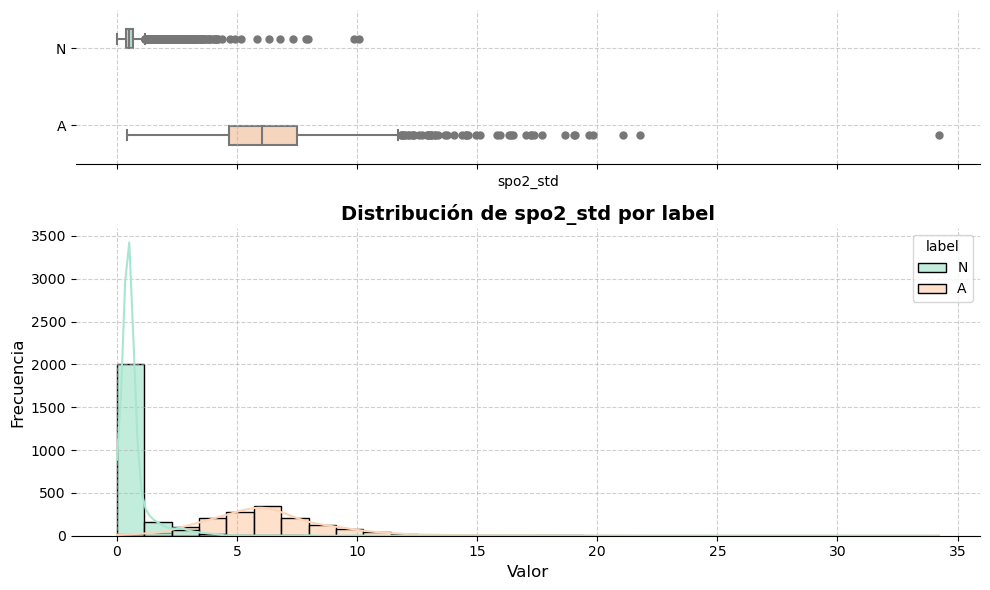

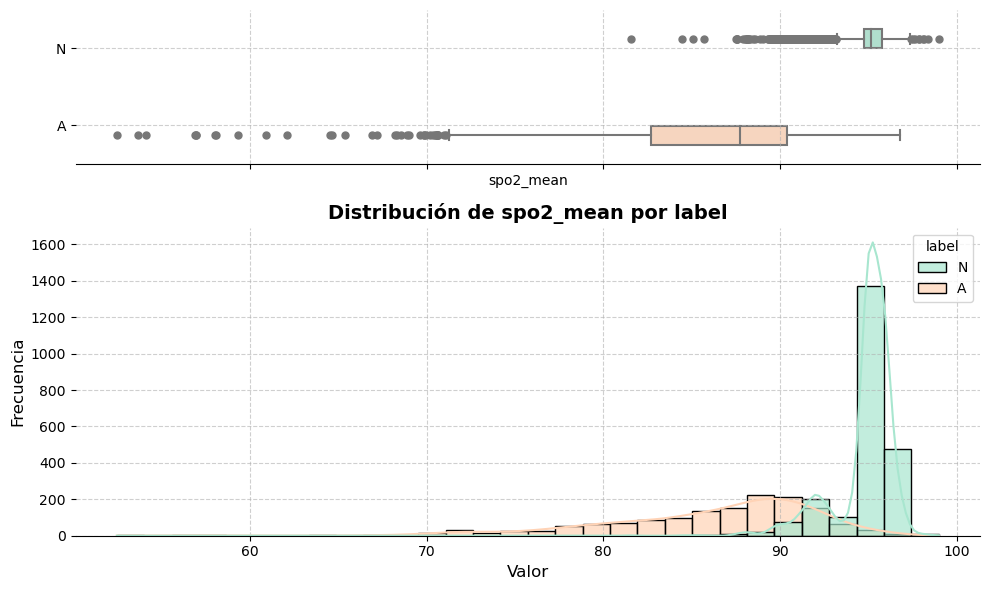

In [15]:
features = ['spo2_min','spo2_max','spo2_var','spo2_std','spo2_mean']  
plot_variable_by_group(df, features,'label', 'SPO2', num_bins=30)

#### ***Análisis***

Para el análisis bivariado de la saturación de oxígeno (SpO₂) se consideraron las características spo2_min, spo2_max, spo2_var, spo2_std y spo2_mean, en conjunto con la variable label, que permite diferenciar entre las épocas con eventos de apnea y aquellas sin alteraciones respiratorias.

En las características de mínimo (spo2_min) se observa que las épocas sin eventos respiratorios presentan valores concentrados alrededor de 95%, consistentes con los rangos fisiológicos normales de saturación de oxígeno, los cuales se sitúan típicamente entre 96% y 100% [8]. En contraste, las épocas con eventos de apnea exhiben un rango intercuartílico más amplio, con valores mínimos que oscilan aproximadamente entre 70% y 80%, lo cual refleja la desaturación transitoria característica de los episodios de apnea.

Respecto a las características de máximo (spo2_max), ambos grupos —con y sin eventos— presentan valores comprendidos entre 95% y 100%, sin diferencias marcadas en los valores centrales. No obstante, el grupo con eventos de apnea muestra una mayor dispersión, evidenciada en un rango intercuartílico más extenso, lo cual sugiere fluctuaciones más pronunciadas en la saturación máxima alcanzada durante dichas épocas.

En las características de varianza (spo2_var) y desviación estándar (spo2_std) las épocas sin eventos respiratorios presentan valores concentrados en torno a cero, lo que indica estabilidad en la saturación. Por el contrario, las épocas con eventos de apnea muestran una mayor dispersión, especialmente en la desviación estándar, cuya mediana alcanza aproximadamente 5, mientras que en las épocas sin eventos este valor se aproxima a 0. Este comportamiento refleja la variabilidad significativa de la señal de SpO₂ durante los episodios de apnea, asociada a los ciclos de desaturación y resaturación típicos de la interrupción respiratoria.

En cuanto a la media (spo2_mean), las épocas sin eventos presentan valores predominantemente cercanos a 95%, consistentes con una oxigenación estable, mientras que las épocas con apnea exhiben valores más dispersos, con un rango intercuartílico comprendido entre 80% y 90%, reflejando nuevamente el impacto de las desaturaciones en el valor promedio.

Finalmente, se identificaron valores atípicos en todas las características analizadas. Algunos de estos presentan valores inferiores al 70%, los cuales carecen de interpretación fisiológica confiable, ya que, aunque la hipoxemia se define como una saturación menor al 90%, los pulsioxímetros están calibrados típicamente para un rango de 70% a 100%, con una precisión entre 2% y 4% [8]. Por tanto, valores por debajo del 70% no representan mediciones fiables, sino que se encuentran fuera del rango de calibración del instrumento, y, en consecuencia, no poseen un significado fisiológico interpretable.


### <span style="color:#1a73e8;"><strong>FLUJO</strong></span>


DISTRIBUCIÓN Y VARIABILIDAD DE LAS VARIABLES FLUJO POR LABEL



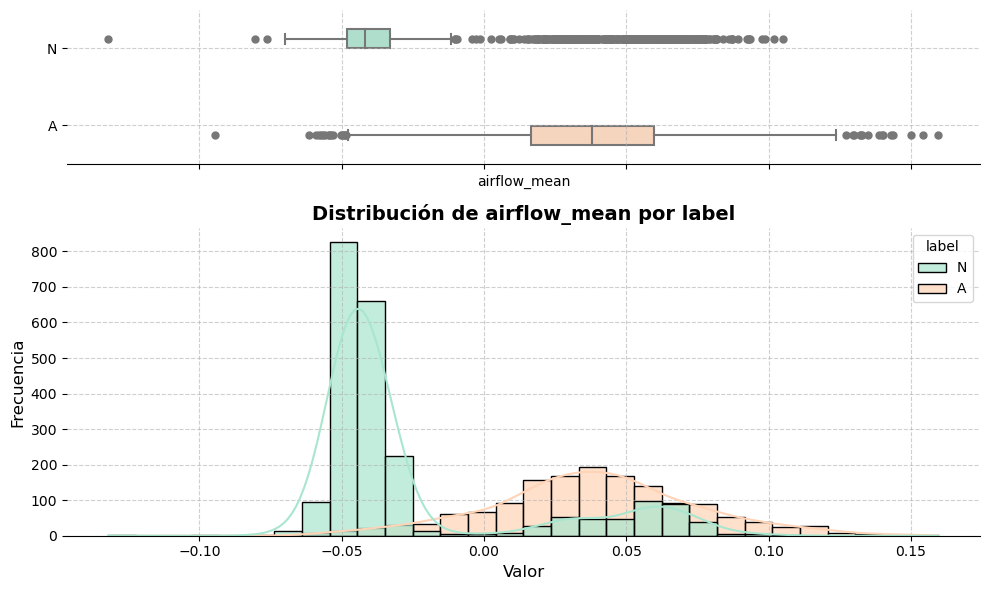

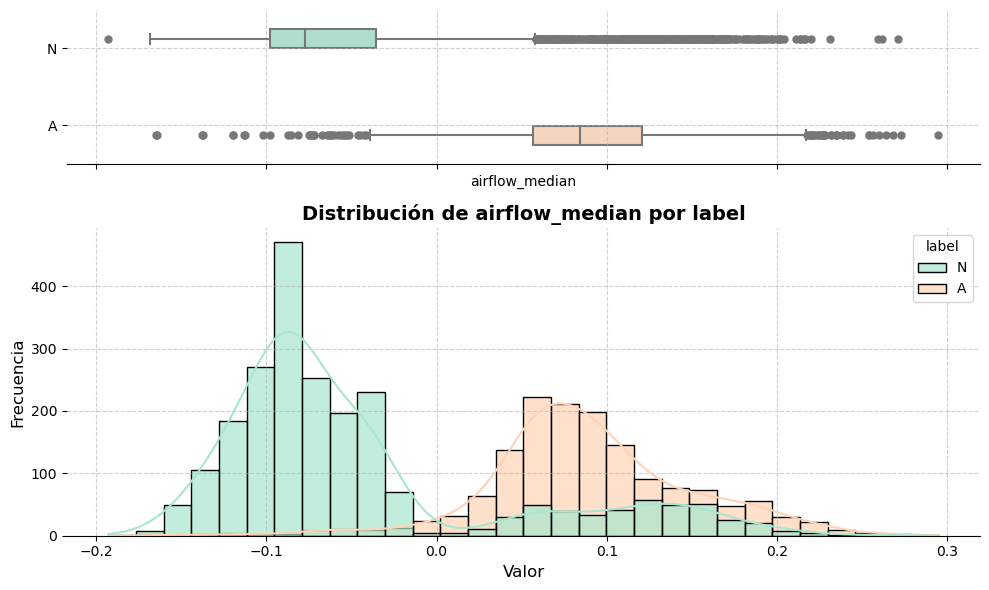

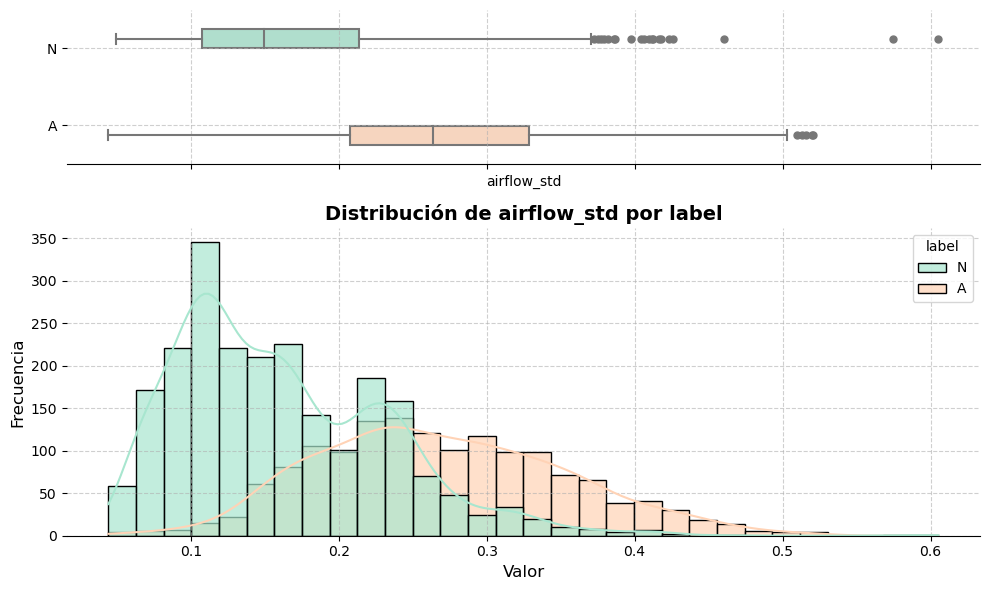

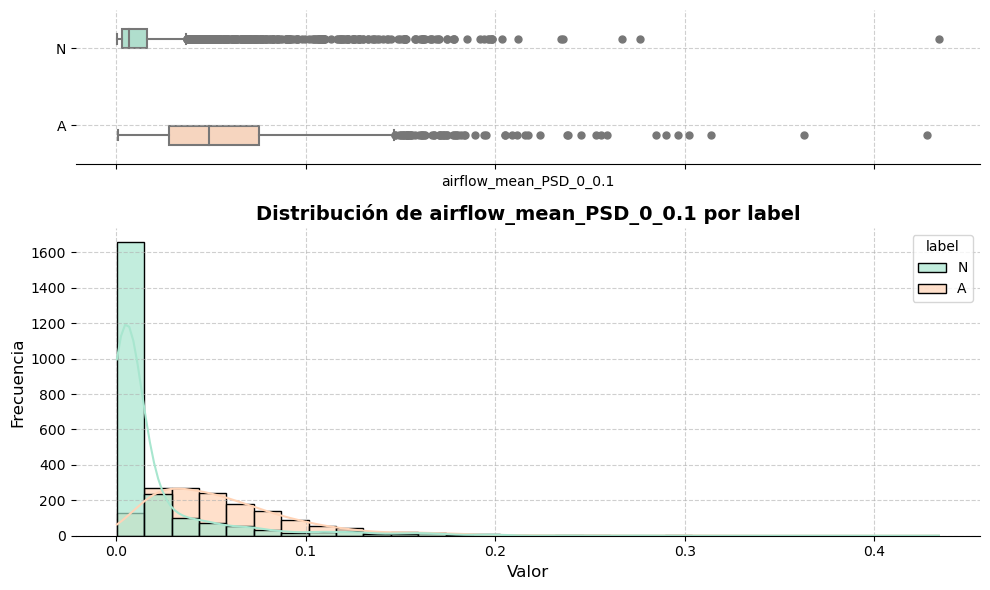

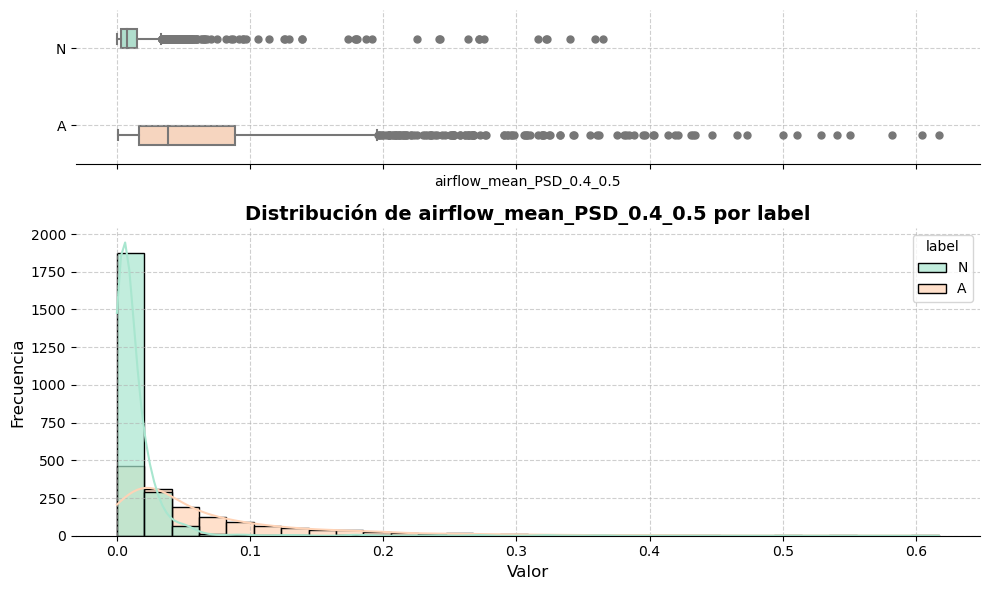

In [16]:
features = ['airflow_mean','airflow_median','airflow_std','airflow_mean_PSD_0_0.1','airflow_mean_PSD_0.4_0.5']  
plot_variable_by_group(df, features,'label', 'FLUJO', num_bins=30)

#### ***Análisis***

En el análisis bivariado de la señal de flujo respiratorio se evaluaron las características airflow_mean, airflow_median, airflow_std, y las componentes frecuenciales airflow_mean_PSD_0_0.1 y airflow_mean_PSD_0_4_0.5, considerando adicionalmente la variable label, que distingue entre épocas con eventos de apnea (A) y épocas sin eventos respiratorios (N).

En las características de tendencia central (mean y median) se observa un desplazamiento de las medianas hacia valores próximos a cero o ligeramente positivos en las épocas con apnea (≈0.04 para el promedio y ≈0.08 para la mediana), en contraste con valores negativos en las épocas sin eventos (≈–0.05 y ≈–0.1, respectivamente). Este desplazamiento se explica por el tiempo prolongado durante el cual la señal de flujo permanece cercana a cero en presencia de apnea, debido a la interrupción o reducción significativa del intercambio de aire. En consecuencia, la mayor parte de la época presenta valores próximos a cero o levemente positivos, como se evidencia en la Figura 1. En cambio, durante las épocas sin eventos respiratorios, la señal exhibe oscilaciones amplias y aproximadamente simétricas entre –0.6 y 0.6, reflejando un patrón respiratorio normal con alternancia rítmica entre las fases de inspiración y espiración, como se observa en la Figura 2.

En la característica airflow_std, la dispersión de los datos es mayor en las épocas con apnea, con un rango intercuartílico aproximado entre 0.2 y 0.3, frente a 0.1–0.2 en las épocas normales. Este aumento de la variabilidad se asocia a la transición entre el cese del flujo y la fase de recuperación ventilatoria, en la que se producen picos de flujo más marcados tras la reanudación del esfuerzo respiratorio.

Las características frecuenciales (airflow_mean_PSD_0_0.1 y airflow_mean_PSD_0_4_0.5) muestran una mayor dispersión en las épocas con eventos respiratorios, mientras que en las épocas sin eventos los valores permanecen próximos a cero. Esto sugiere que los episodios de apnea modifican la distribución espectral del flujo, con un incremento relativo de la energía en determinadas bandas de frecuencia debido a la irregularidad y fragmentación del patrón ventilatorio.

Finalmente, se observan valores atípicos en todas las variables, especialmente en las frecuenciales, con algunos superiores a 0.4 para PSD_0_0.1 y a 0.6 para PSD_0_4_0.5. Estos valores extremos pueden corresponder a transiciones abruptas entre apnea y ventilación, o a artefactos transitorios.

### ***Matriz de correlación***

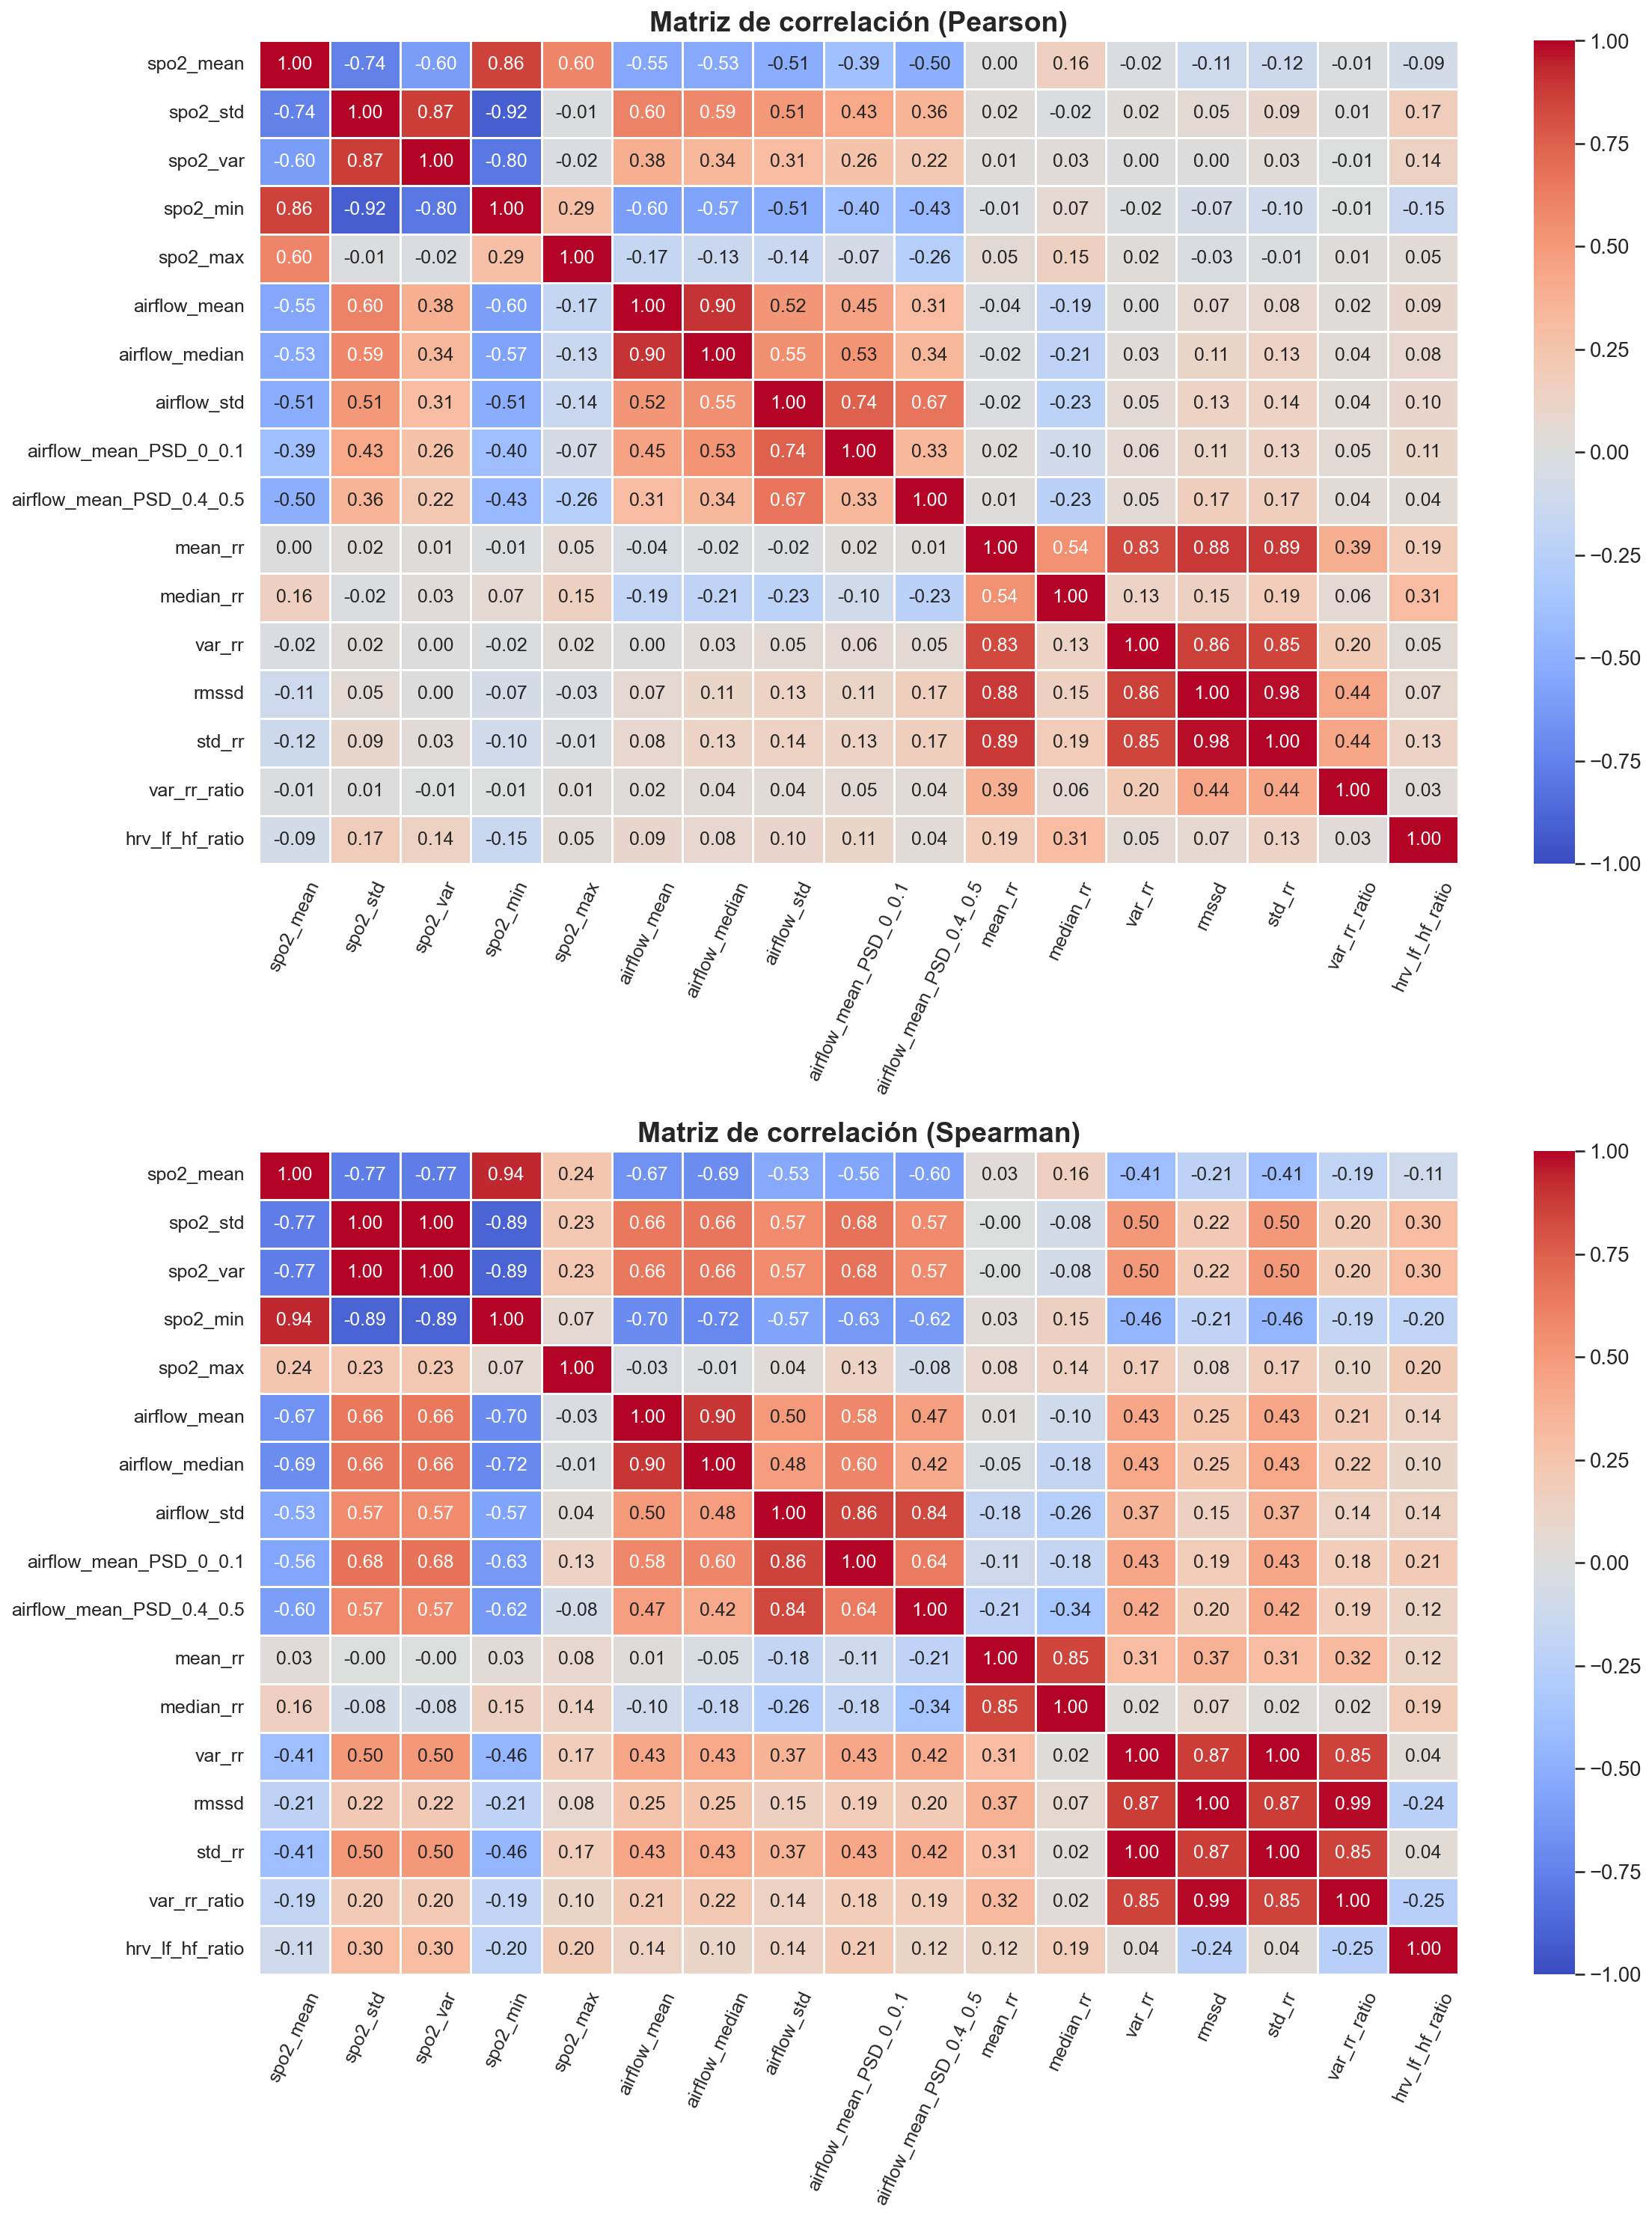

🔹 Correlaciones Pearson > 0.8:


Variable 1      Variable 2  Correlación
130         rmssd          std_rr     0.980750
70   airflow_mean  airflow_median     0.904808
118       mean_rr          std_rr     0.888521
117       mean_rr           rmssd     0.883259
16       spo2_std        spo2_var     0.868469
126        var_rr           rmssd     0.862059
2       spo2_mean        spo2_min     0.856184
127        var_rr          std_rr     0.846741
116       mean_rr          var_rr     0.831595
17       spo2_std        spo2_min    -0.919107


🔹 Correlaciones Spearman > 0.8:


Variable 1                Variable 2  Correlación
16       spo2_std                  spo2_var     1.000000
127        var_rr                    std_rr     1.000000
131         rmssd              var_rr_ratio     0.990244
2       spo2_mean                  spo2_min     0.935677
70   airflow_mean            airflow_median     0.895335
130         rmssd                    std_rr     0.872999
126        var_rr                     rmssd     0.872999
91    airflow_std    airflow_mean_PSD_0_0.1     0.855117
133        std_rr              var_rr_ratio     0.851711
128        var_rr              var_rr_ratio     0.851711
115       mean_rr                 median_rr     0.846960
92    airflow_std  airflow_mean_PSD_0.4_0.5     0.837487
17       spo2_std                  spo2_min    -0.893628
31       spo2_var                  spo2_min    -0.893628

In [17]:
# --- Seleccionar columnas numéricas ---
df_num = df.select_dtypes(include=['float64', 'int64'])

# --- Calcular matrices de correlación ---
corr_pearson = df_num.corr(method='pearson')
corr_spearman = df_num.corr(method='spearman')

# --- Función para extraer correlaciones > 0.8 ---
def high_correlations(corr_matrix, threshold=0.8):
    corr_pairs = (
        corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
        .stack()
        .reset_index()
    )
    corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlación']
    return corr_pairs[abs(corr_pairs['Correlación']) > threshold].sort_values(
        by='Correlación', ascending=False
    )

# --- Filtrar correlaciones altas ---
high_corr_pearson = high_correlations(corr_pearson)
high_corr_spearman = high_correlations(corr_spearman)

# --- Configuración estética general ---
sns.set(style="whitegrid", font_scale=1.2)
plt.rcParams['figure.dpi'] = 150

# --- Figura con dos subgráficos (una columna) ---
fig, axes = plt.subplots(2, 1, figsize=(16, 20))

# --- Mapa de calor Pearson ---
sns.heatmap(
    corr_pearson, annot=True, fmt=".2f", cmap="coolwarm",
    cbar=True, square=False, linewidths=0.5,
    ax=axes[0], vmin=-1, vmax=1,
    annot_kws={"size": 12}
)
axes[0].set_title("Matriz de correlación (Pearson)", fontsize=18, fontweight="bold")
axes[0].tick_params(axis='x', rotation=65, labelsize=12)
axes[0].tick_params(axis='y', rotation=0, labelsize=12)

# --- Mapa de calor Spearman ---
sns.heatmap(
    corr_spearman, annot=True, fmt=".2f", cmap="coolwarm",
    cbar=True, square=False, linewidths=0.5,
    ax=axes[1], vmin=-1, vmax=1,
    annot_kws={"size": 12}
)
axes[1].set_title("Matriz de correlación (Spearman)", fontsize=18, fontweight="bold")
axes[1].tick_params(axis='x', rotation=65, labelsize=12)
axes[1].tick_params(axis='y', rotation=0, labelsize=12)

plt.tight_layout()
plt.show()

# --- Mostrar correlaciones altas ---
print("🔹 Correlaciones Pearson > 0.8:")
display(high_corr_pearson)

print("\n🔹 Correlaciones Spearman > 0.8:")
display(high_corr_spearman)

#### ***Análisis***

Con el objetivo de identificar relaciones lineales y monótonas entre las características extraídas, se aplicaron los coeficientes de correlación de Pearson y Spearman. En la matriz de correlación de Pearson, se identificaron asociaciones altas (r > 0.8) entre múltiples características. Destaca la correlación entre rmssd y std_rr (r = 0.98), lo que evidencia que ambas cuantifican de manera equivalente la variabilidad del ritmo cardíaco (HRV), reflejando la magnitud de las fluctuaciones de los intervalos RR entre latidos consecutivos. Asimismo, las correlaciones elevadas entre mean_rr, std_rr, rmssd y var_rr (todas superiores a 0.83) confirman que estas métricas están fuertemente interrelacionadas, ya que describen diferentes aspectos estadísticos de la misma dinámica cardíaca. En relación con las características derivadas del flujo respiratorio, se observa una correlación alta entre airflow_mean y airflow_median (r = 0.90), lo que indica que ambas variables describen comportamientos muy similares del flujo promedio en las distintas épocas. En el caso de la saturación de oxígeno, la fuerte relación entre spo2_std y spo2_var (r = 0.87) se explica por la dependencia matemática entre ambas medidas de dispersión. Además, la correlación negativa entre spo2_std y spo2_min (r = -0.92) señala que a mayor variabilidad en la señal de SpO₂, menores son los valores mínimos alcanzados, lo que refleja desaturaciones más pronunciadas durante los episodios de apnea.

La correlación de Spearman refuerza los patrones observados, evidenciando asociaciones monótonas igualmente elevadas. Se registraron correlaciones perfectas (ρ = 1.0) entre spo2_std y spo2_var, así como entre var_rr y std_rr, lo que refleja una estrecha relación estadística entre estas métricas, dado que ambas describen propiedades de dispersión derivadas de la misma señal. De manera consistente, la correlación alta entre rmssd y var_rr_ratio (ρ = 0.99), junto con la observada entre mean_rr y median_rr (ρ = 0.85), demuestra la consistencia interna de las medidas de variabilidad cardíaca calculadas a partir de los intervalos RR. Asimismo, las correlaciones positivas entre airflow_std y las componentes espectrales airflow_mean_PSD_0_0.1 (ρ = 0.86) y airflow_mean_PSD_0.4_0.5 (ρ = 0.84) indican que los incrementos en la variabilidad del flujo respiratorio se asocian con mayores fluctuaciones energéticas en las bandas de baja y alta frecuencia. Finalmente, las correlaciones negativas entre spo2_std, spo2_var y spo2_min (ρ = -0.89) confirman que una mayor dispersión en la saturación de oxígeno tiende a coincidir con descensos más pronunciados en los valores mínimos de SpO₂, reflejando los efectos característicos de las desaturaciones durante los eventos de apnea.

En conjunto, los resultados evidencian una alta redundancia entre las métricas derivadas del ritmo cardíaco y de la saturación de oxígeno, así como entre las medidas temporales y espectrales del flujo respiratorio. Este comportamiento indica que varias de las características analizadas describen los mismos procesos fisiológicos o responden a variaciones comunes, lo que reduce su capacidad de aportar información independiente. Por tanto, en etapas posteriores será necesario aplicar técnicas de selección o reducción de características orientadas a eliminar la redundancia y conservar únicamente las variables más informativas y fisiológicamente relevantes.

## <span style="color:#1a73e8;"><strong>Detección y análisis de atípicos</strong></span>

Para la detección de outliers se emplearon los métodos IQR, Z-score y DBSCAN. En el caso del IQR, los límites se establecieron considerando 1.5 veces el rango intercuartílico; para el Z-score, se identificaron los valores con puntuaciones superiores a 3; y en DBSCAN se utilizaron ε = 0.5 y un mínimo de muestras (min_samples) de 5. Los resultados se representaron de manera conjunta mediante diagramas de boxplot, diferenciando los registros según las clases de apnea y no apnea. Se analizaron principalmente los registros detectados por al menos dos métodos, dado que cada técnica presenta limitaciones: el Z-score puede subestimar outliers en distribuciones asimétricas, mientras que el límite del IQR puede resultar restrictivo, de modo que algunos valores que exceden este rango no necesariamente corresponden a desviaciones relevantes.

In [41]:
def detectar_outliers_por_etiqueta(df, variables, label_col='label', eps=0.5, min_samples=5):
    """
    Detecta y visualiza outliers por IQR, Z-score y DBSCAN en múltiples variables,
    dividiendo los datos por etiqueta (por ejemplo, apnea 'A' y normal 'N').
    """

    sns.set(style="whitegrid", font_scale=1.1)
    plt.rcParams['figure.dpi'] = 130

    # --- Paleta de colores---
    palette = {
        "normal": "#A7C7E7",
        "iqr": "#F4A261",
        "zscore": "#9D6BFF",
        "dbscan": "#E76F51",
        "compartidos": "#264653",
        "spo2_bajo": "#FF7B7B"
    }

    etiquetas = df[label_col].unique()

    for var in variables:
        plt.figure(figsize=(12, 6))
        plt.title(f"Detección de outliers - {var} por etiqueta", fontsize=14, fontweight="bold")
        plt.xlabel(var, fontsize=12)

        # --- Preparar datos para boxplot múltiple ---
        data = []
        group_labels = []
        for label in etiquetas:
            subset = df[df[label_col] == label][var].dropna().values.flatten()
            data.append(subset)
            group_labels.append(label)

        # --- Boxplots (uno por etiqueta) ---
        sns.boxplot(data=data, orient="h", color="#E9ECEF", linewidth=1.1)
        
        # --- sobreponer los puntos ---
        for i, label in enumerate(etiquetas):
            subset = data[i]

            # --- IQR ---
            Q1, Q3 = np.percentile(subset, [25, 75])
            IQR = Q3 - Q1
            lim_inf, lim_sup = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
            out_iqr = (subset < lim_inf) | (subset > lim_sup)


            # --- Z-score ---
            z = np.abs(zscore(subset))
            out_z = z > 3

            # --- DBSCAN ---
            db = DBSCAN(eps=eps, min_samples=min_samples)
            labels_db = db.fit_predict(subset.reshape(-1, 1))
            out_db = labels_db == -1

            # --- Combinación ---
            out_total = out_iqr.astype(int) + out_z.astype(int) + out_db.astype(int)
            normales = out_total == 0
            solo_iqr = out_iqr & (out_total == 1)
            solo_z = out_z & (out_total == 1)
            solo_db = out_db & (out_total == 1)
            compartidos = out_total >= 2

            spo2_bajo = np.zeros_like(subset, dtype=bool)
            if var == 'spo2_min':
                spo2_bajo = subset < 70

            # --- Reporte ---
            print(f"\n🔹 Variable: {var} | Etiqueta: {label}")
            print(f" - Outliers IQR: {np.sum(out_iqr)} | Limite inferior: {round(lim_inf,3)}, Limite superior: {round(lim_sup,3)}")
            print(f" - Outliers Z-score: {np.sum(out_z)}")
            print(f" - Outliers DBSCAN: {np.sum(out_db)}")
            print(f" - Compartidos (≥2 métodos): {np.sum(compartidos)}")
            if var == 'spo2_min':
                print(f" - SpO2 < 70%: {np.sum(spo2_bajo)}")

            # --- Puntos ---
            jitter = np.random.uniform(i - 0.15, i + 0.15, size=len(subset))
            plt.scatter(subset[normales], jitter[normales], color=palette["normal"], s=35, alpha=0.5, label="Normales" if i == 0 else "")
            plt.scatter(subset[solo_iqr], jitter[solo_iqr], color=palette["iqr"], s=55, alpha=0.8, label="IQR" if i == 0 else "")
            plt.scatter(subset[solo_z], jitter[solo_z], color=palette["zscore"], s=55, alpha=0.8, label="Z-score" if i == 0 else "")
            plt.scatter(subset[solo_db], jitter[solo_db], color=palette["dbscan"], s=55, alpha=0.8, label="DBSCAN" if i == 0 else "")

            # --- SpO2 < 70% ---
            if var == 'spo2_min':
                plt.scatter(subset[spo2_bajo], jitter[spo2_bajo], color=palette["spo2_bajo"], s=80, alpha=0.9, label="SpO2 < 70%" if i == 0 else "")

            plt.scatter(subset[compartidos], jitter[compartidos], color=palette["compartidos"], s=80, alpha=0.9, label="Compartidos (≥2)" if i == 0 else "")


            # --- Líneas IQR ---
            plt.axvline(Q1, color="#2A9D8F", linestyle="--", linewidth=1.0)
            plt.axvline(Q3, color="#2A9D8F", linestyle="--", linewidth=1.0)
            plt.axvline(lim_inf, color="#F4A261", linestyle=":", linewidth=1.0)
            plt.axvline(lim_sup, color="#F4A261", linestyle=":", linewidth=1.0)

        plt.yticks(range(len(etiquetas)), etiquetas)
        plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", frameon=True)
        plt.tight_layout()
        plt.show()

### <span style="color:#1a73e8;"><strong> ECG</strong></span>


🔹 Variable: mean_rr | Etiqueta: N
 - Outliers IQR: 19
 - Outliers Z-score: 15
 - Outliers DBSCAN: 4
 - Compartidos (≥2 métodos): 15

🔹 Variable: mean_rr | Etiqueta: A
 - Outliers IQR: 56
 - Outliers Z-score: 10
 - Outliers DBSCAN: 4
 - Compartidos (≥2 métodos): 10


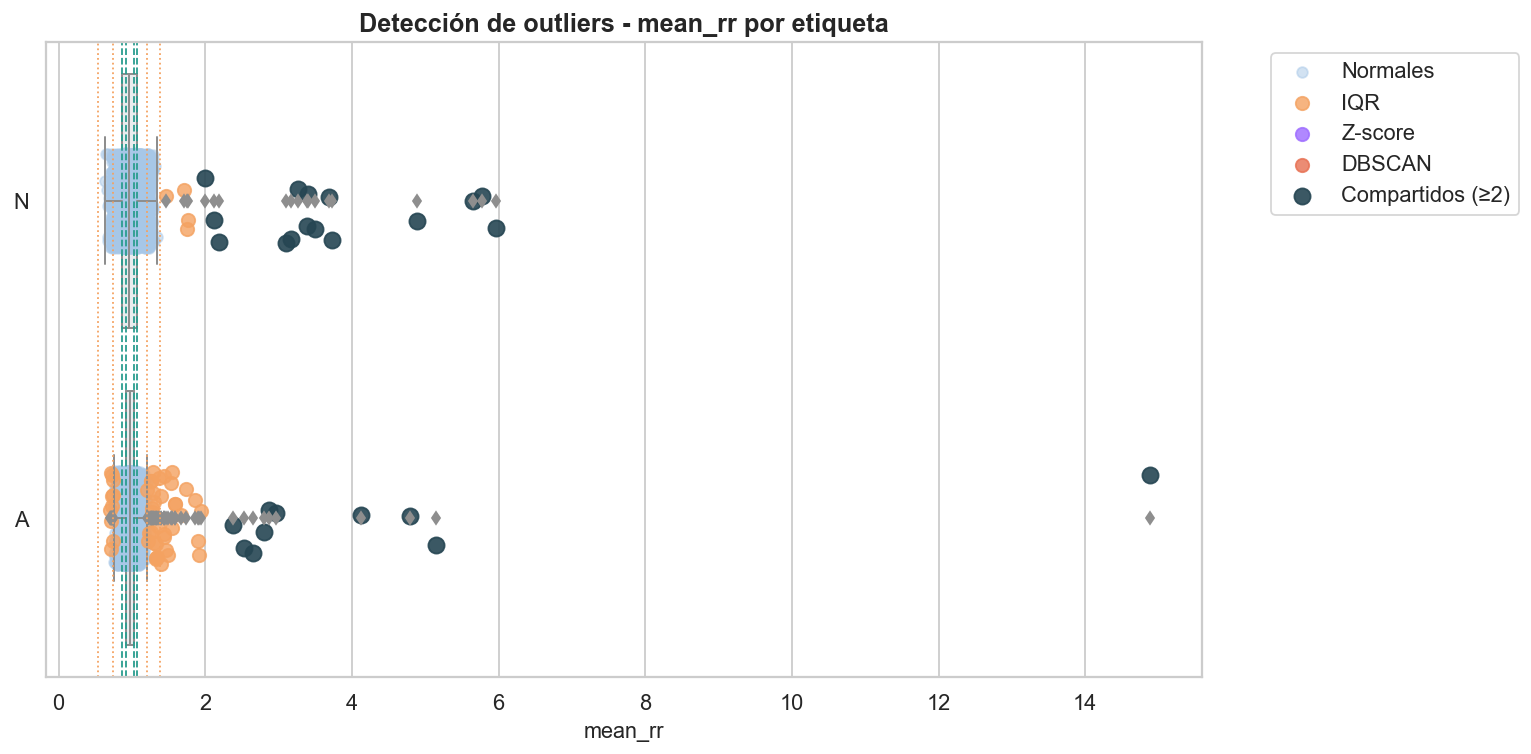


🔹 Variable: median_rr | Etiqueta: N
 - Outliers IQR: 13
 - Outliers Z-score: 13
 - Outliers DBSCAN: 3
 - Compartidos (≥2 métodos): 13

🔹 Variable: median_rr | Etiqueta: A
 - Outliers IQR: 8
 - Outliers Z-score: 9
 - Outliers DBSCAN: 1
 - Compartidos (≥2 métodos): 8


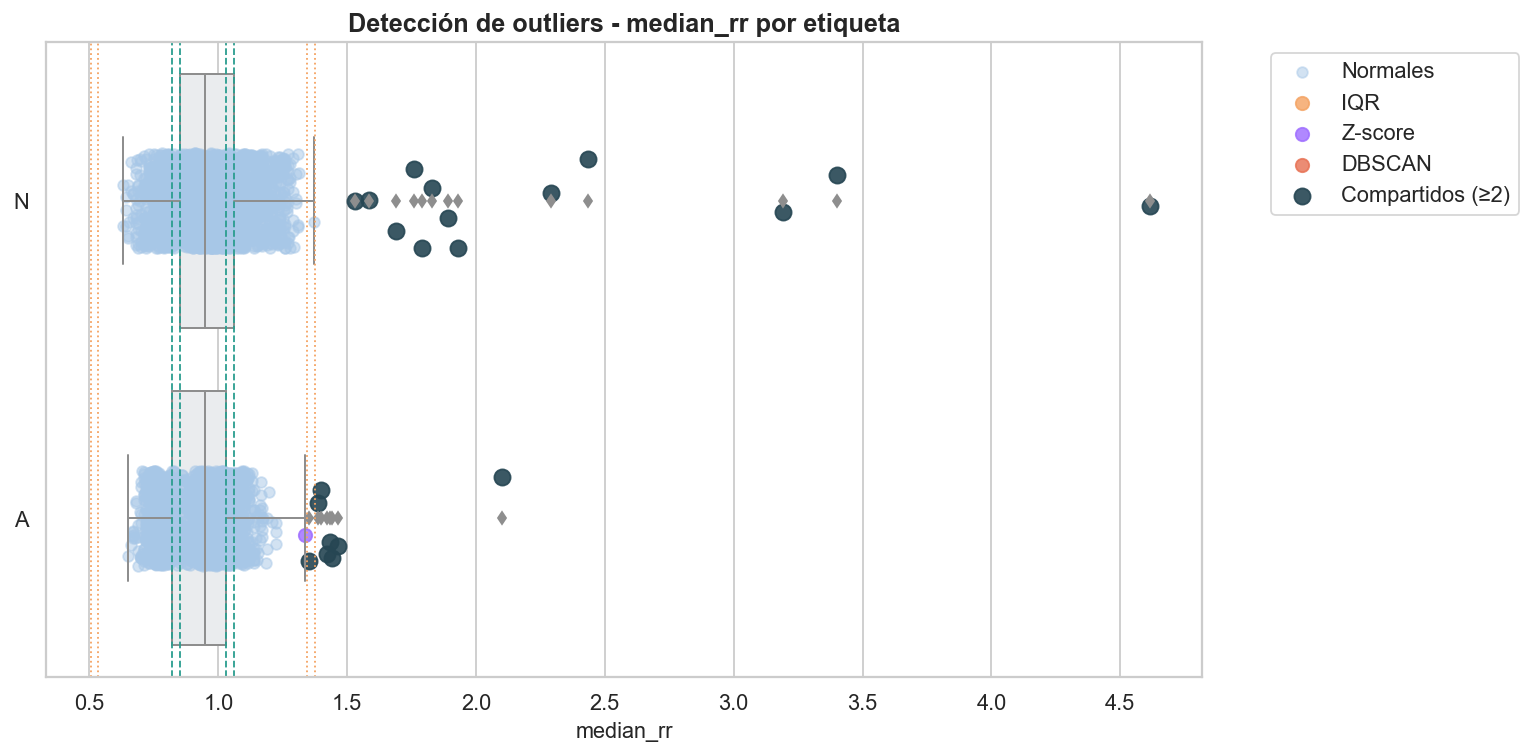


🔹 Variable: var_rr | Etiqueta: N
 - Outliers IQR: 234
 - Outliers Z-score: 10
 - Outliers DBSCAN: 18
 - Compartidos (≥2 métodos): 18

🔹 Variable: var_rr | Etiqueta: A
 - Outliers IQR: 227
 - Outliers Z-score: 4
 - Outliers DBSCAN: 15
 - Compartidos (≥2 métodos): 15


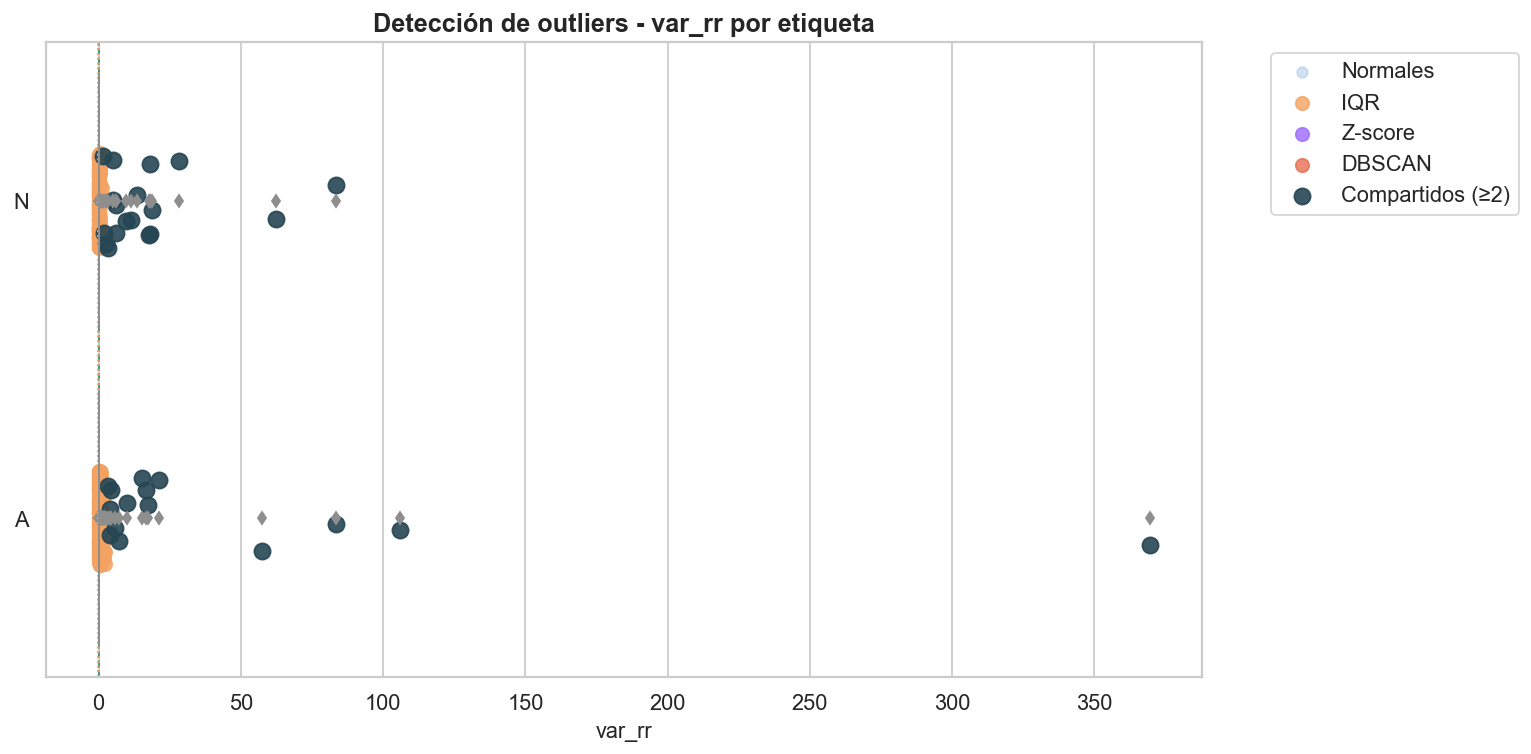


🔹 Variable: rmssd | Etiqueta: N
 - Outliers IQR: 149
 - Outliers Z-score: 18
 - Outliers DBSCAN: 12
 - Compartidos (≥2 métodos): 18

🔹 Variable: rmssd | Etiqueta: A
 - Outliers IQR: 147
 - Outliers Z-score: 11
 - Outliers DBSCAN: 6
 - Compartidos (≥2 métodos): 11


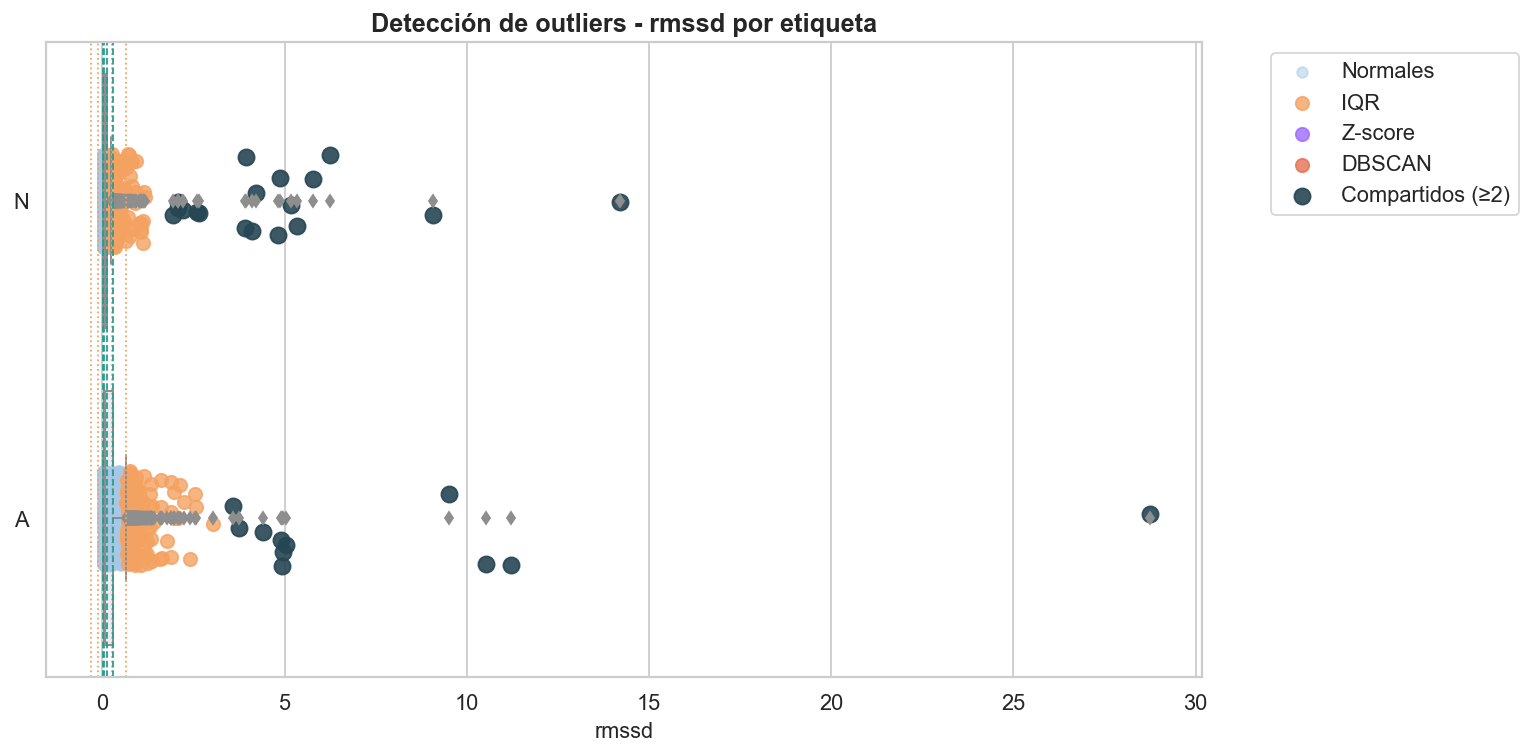


🔹 Variable: std_rr | Etiqueta: N
 - Outliers IQR: 99
 - Outliers Z-score: 18
 - Outliers DBSCAN: 10
 - Compartidos (≥2 métodos): 18

🔹 Variable: std_rr | Etiqueta: A
 - Outliers IQR: 156
 - Outliers Z-score: 11
 - Outliers DBSCAN: 9
 - Compartidos (≥2 métodos): 11


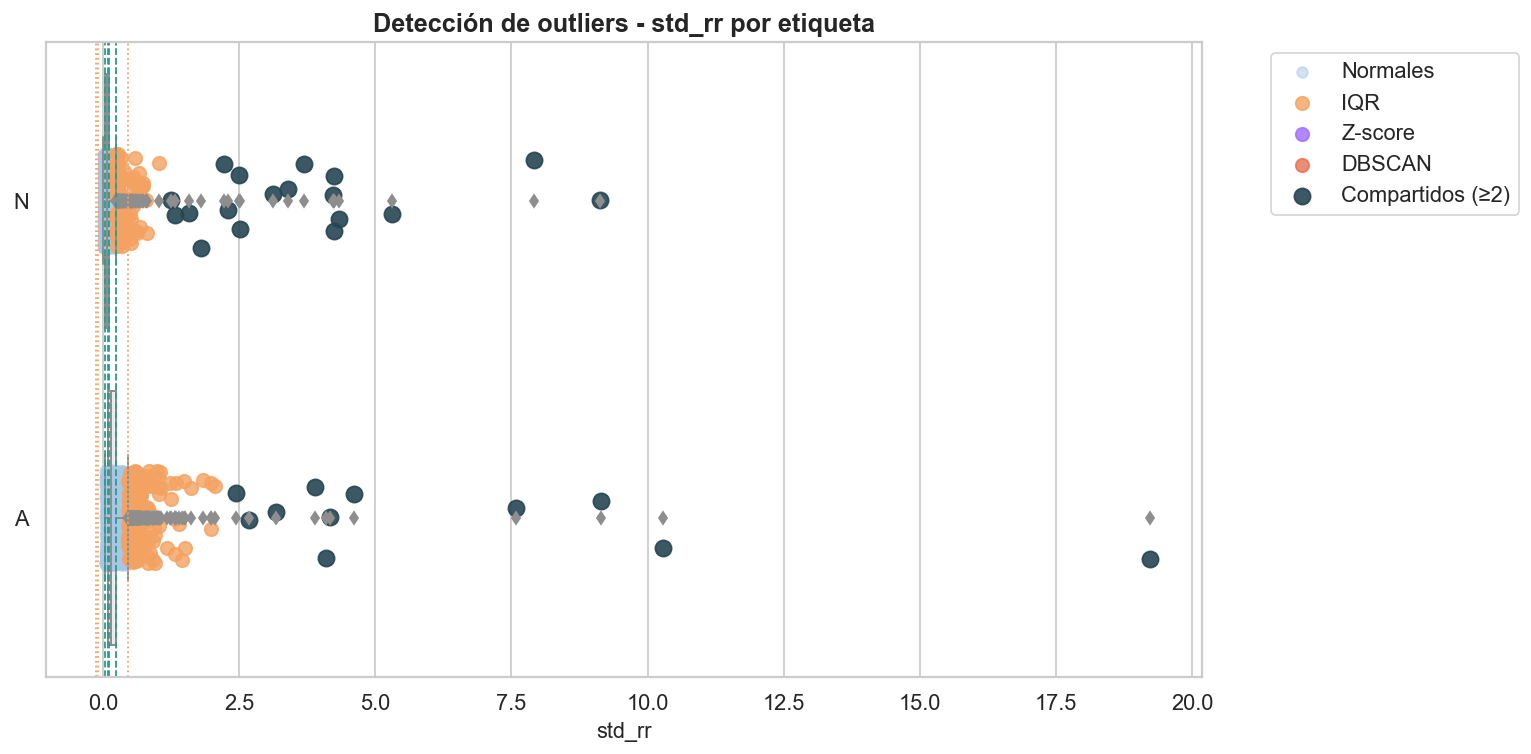


🔹 Variable: var_rr_ratio | Etiqueta: N
 - Outliers IQR: 270
 - Outliers Z-score: 7
 - Outliers DBSCAN: 8
 - Compartidos (≥2 métodos): 8

🔹 Variable: var_rr_ratio | Etiqueta: A
 - Outliers IQR: 258
 - Outliers Z-score: 4
 - Outliers DBSCAN: 8
 - Compartidos (≥2 métodos): 8


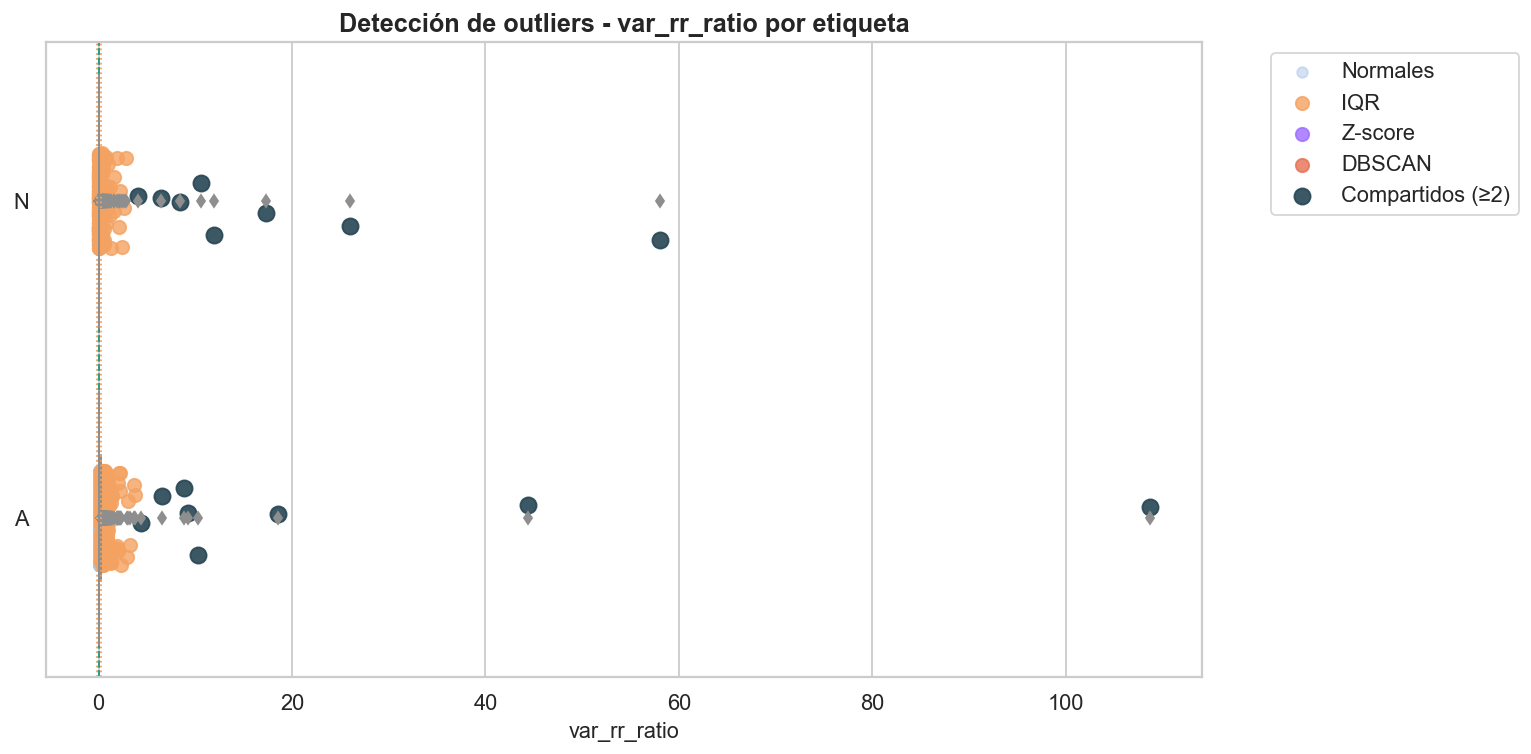


🔹 Variable: hrv_lf_hf_ratio | Etiqueta: N
 - Outliers IQR: 160
 - Outliers Z-score: 13
 - Outliers DBSCAN: 21
 - Compartidos (≥2 métodos): 21

🔹 Variable: hrv_lf_hf_ratio | Etiqueta: A
 - Outliers IQR: 85
 - Outliers Z-score: 27
 - Outliers DBSCAN: 16
 - Compartidos (≥2 métodos): 27


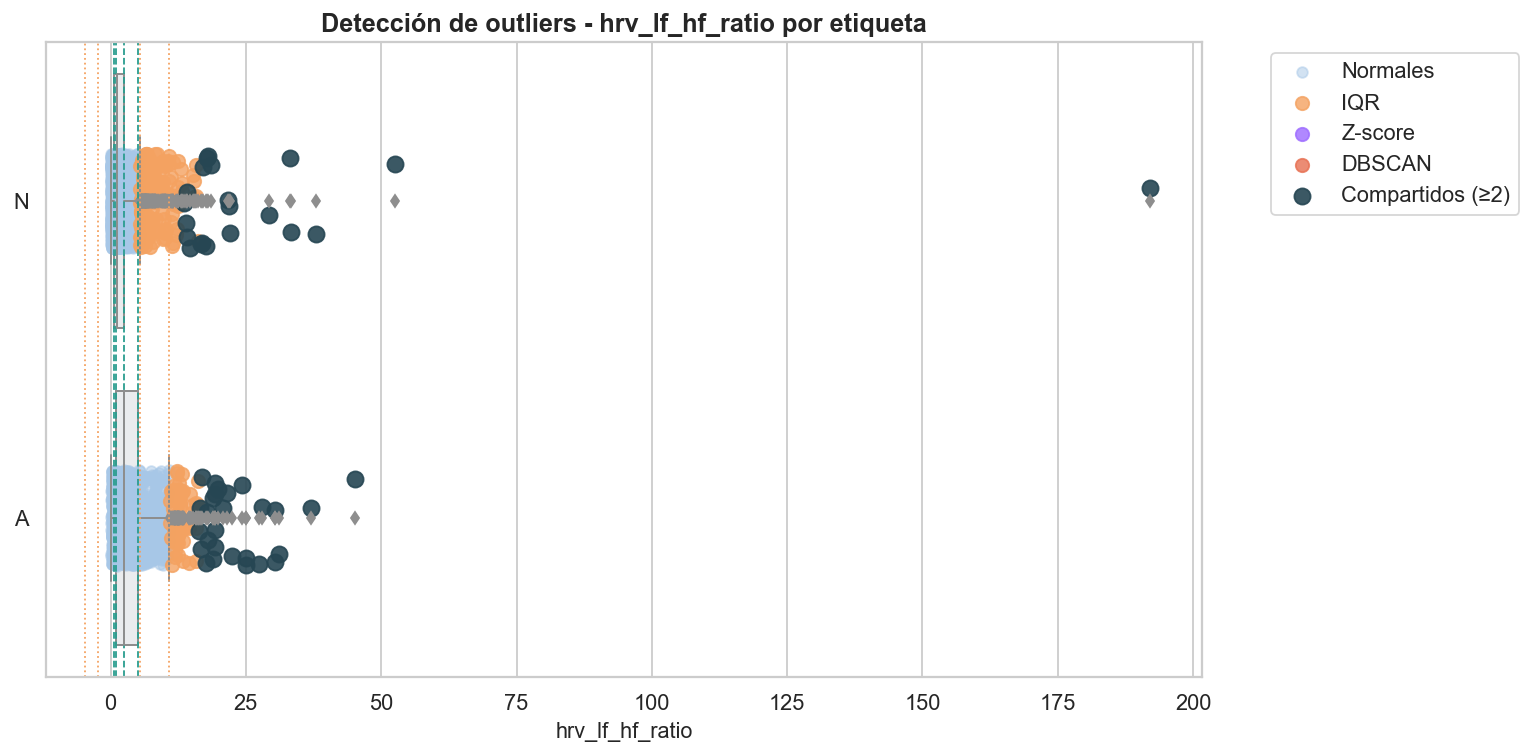

In [108]:
features = ['mean_rr','median_rr', 'var_rr','rmssd', 'std_rr', 'var_rr_ratio', 'hrv_lf_hf_ratio']  

detectar_outliers_por_etiqueta(df, features, eps=0.5, min_samples=5)

#### ***Análisis***

En la evaluación de las características obtenidas a partir de los intervalos RR, se identificaron valores atípicos en las métricas evaluadas tanto en épocas con como sin eventos de apnea. Para el análisis se consideraron únicamente aquellos valores detectados de manera consistente por al menos dos de los métodos aplicados.

En las métricas mean_rr y median_rr, se detectaron 15 valores atípicos compartidos en épocas sin apnea y 10 durante eventos de apnea. Algunos de ellos alcanzan valores extremos, con mean_rr superiores a 14 s y median_rr mayores a 4.5 s, equivalentes a frecuencias cardíacas fisiológicamente imposibles (>400 bpm). Estos casos se asocian principalmente con errores en la detección de picos R o artefactos transitorios de señal, por lo que deben eliminarse del conjunto de datos

En las métricas var_rr y std_rr se identificaron valores atípicos compartidos: para std_rr, 18 en épocas sin apnea y 11 durante apnea; para var_rr, 18 en épocas sin apnea y 15 durante apnea. En particular, un valor de std_rr durante apnea supera 17 s, alejándose considerablemente del rango central cercano a cero. Estas desviaciones se atribuyen a intervalos RR anómalos o mal segmentados, posiblemente producto de fallos en la detección de picos o interrupciones en el registro. La mayoría de los valores compartidos restantes se concentran entre 2 s y 10 s, rango que podría corresponder a variaciones abruptas, aunque probablemente no fisiológicas

En la métrica rmssd, se identificaron 18 valores atípicos compartidos en épocas sin apnea y 11 durante apnea. Algunos de estos superan los 0.2 s (200 ms), excediendo ampliamente los valores fisiológicos esperados. En adultos sanos, los valores normales de RMSSD suelen encontrarse entre 27 y 72 ms [10]. Estas discrepancias se asocian con artefactos de señal o detecciones erróneas de intervalos consecutivos, por lo que los valores deben depurarse o excluirse.

En var_rr_ratio, se registraron ocho valores atípicos en ambos grupos, incluyendo un caso que supera el valor de 100, indicativo de inestabilidad o divisiones por denominadores cercanos a cero. Finalmente, la métrica hrv_lf_hf_ratio mostró el mayor número de desvíos compartidos, con 21 valores sin apnea y 27 con apnea, alcanzando valores hasta 175 en las épocas sin eventos y entre 20 y 50 en presencia de apnea. En la literatura, se reporta que el cociente LF/HF alcanza valores alrededor de 3 durante el sueño REM en sujetos sanos y puede elevarse hasta ≈8.9 en pacientes post-infarto durante REM [11]. Por tanto, los extremos observados en este estudio probablemente reflejan artefactos en la estimación espectral que deben excluirse.

En conjunto, los resultados reflejan que los valores atípicos detectados no corresponden a variaciones fisiológicas reales, sino a anomalías de la señal, por lo que es necesario eliminar estos valores. 


### <span style="color:#1a73e8;"><strong>SPO2</strong></span>


🔹 Variable: spo2_min | Etiqueta: N
 - Outliers IQR: 188 | Limite inferior: 90.0, Limite superior: 98.0
 - Outliers Z-score: 14
 - Outliers DBSCAN: 15
 - Compartidos (≥2 métodos): 15
 - SpO2 < 70%: 6

🔹 Variable: spo2_min | Etiqueta: A
 - Outliers IQR: 49 | Limite inferior: 56.0, Limite superior: 96.0
 - Outliers Z-score: 29
 - Outliers DBSCAN: 42
 - Compartidos (≥2 métodos): 49
 - SpO2 < 70%: 309


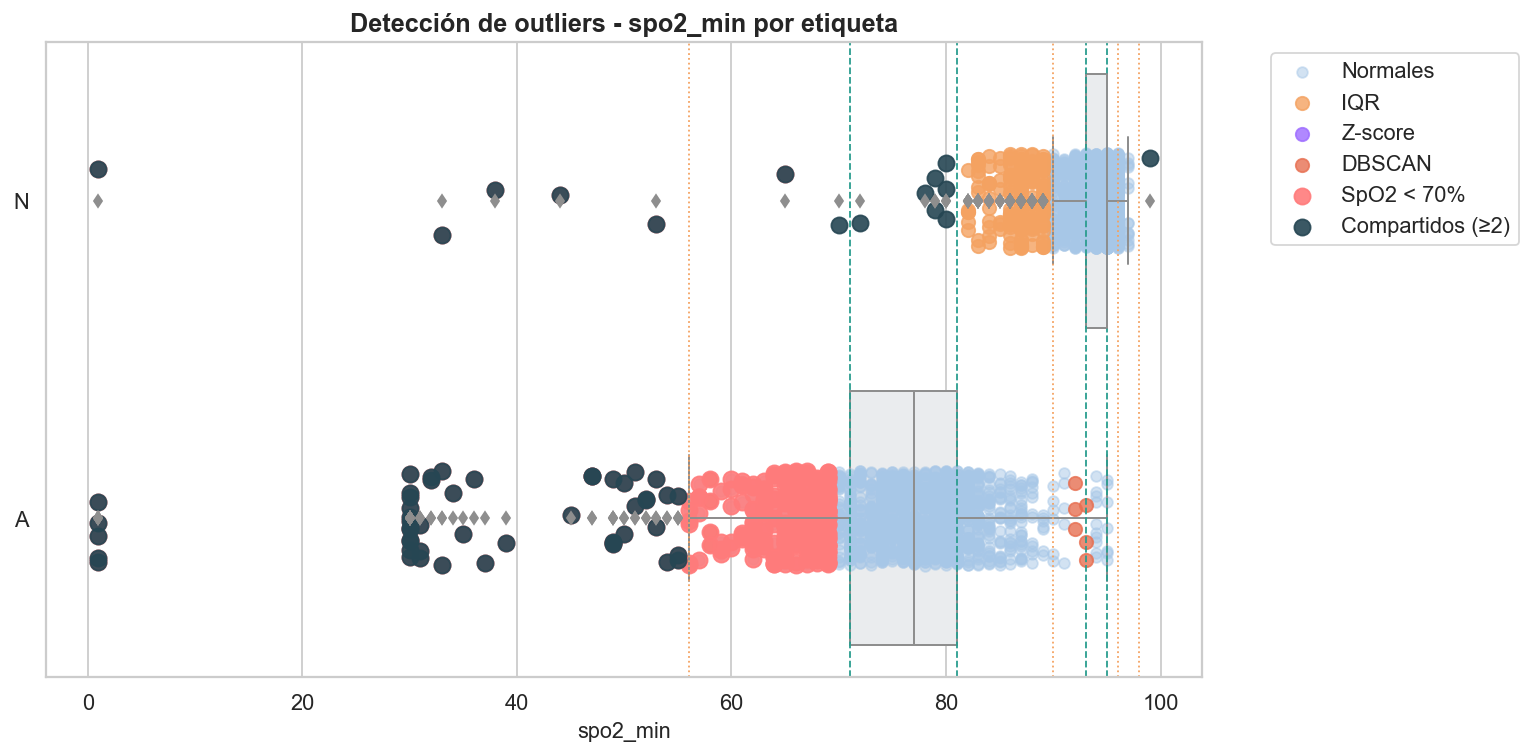


🔹 Variable: spo2_max | Etiqueta: N
 - Outliers IQR: 257 | Limite inferior: 94.5, Limite superior: 98.5
 - Outliers Z-score: 62
 - Outliers DBSCAN: 7
 - Compartidos (≥2 métodos): 62

🔹 Variable: spo2_max | Etiqueta: A
 - Outliers IQR: 178 | Limite inferior: 90.5, Limite superior: 102.5
 - Outliers Z-score: 35
 - Outliers DBSCAN: 10
 - Compartidos (≥2 métodos): 35


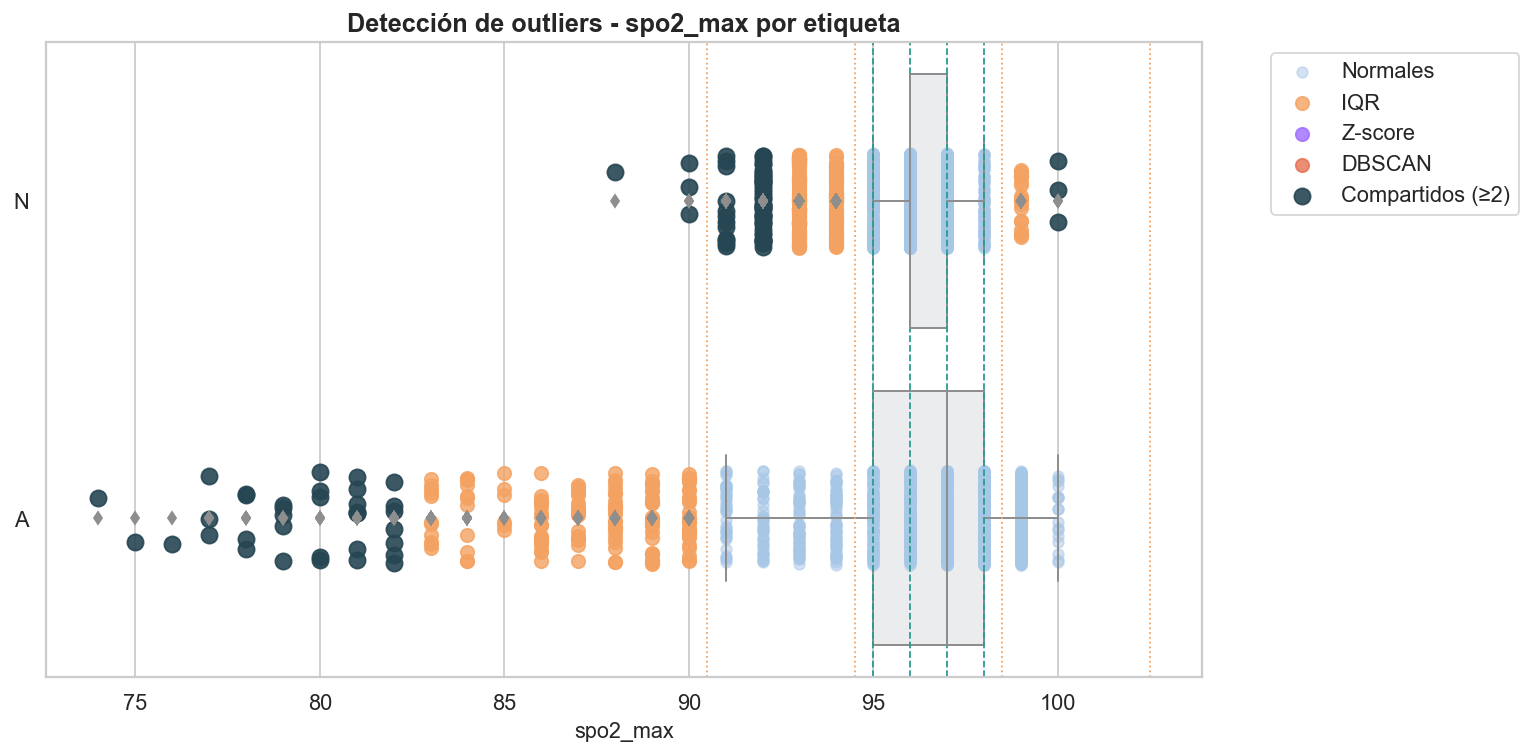


🔹 Variable: spo2_var | Etiqueta: N
 - Outliers IQR: 303 | Limite inferior: -0.367, Limite superior: 0.982
 - Outliers Z-score: 22
 - Outliers DBSCAN: 22
 - Compartidos (≥2 métodos): 26

🔹 Variable: spo2_var | Etiqueta: A
 - Outliers IQR: 92 | Limite inferior: -30.026, Limite superior: 107.867
 - Outliers Z-score: 23
 - Outliers DBSCAN: 112
 - Compartidos (≥2 métodos): 92


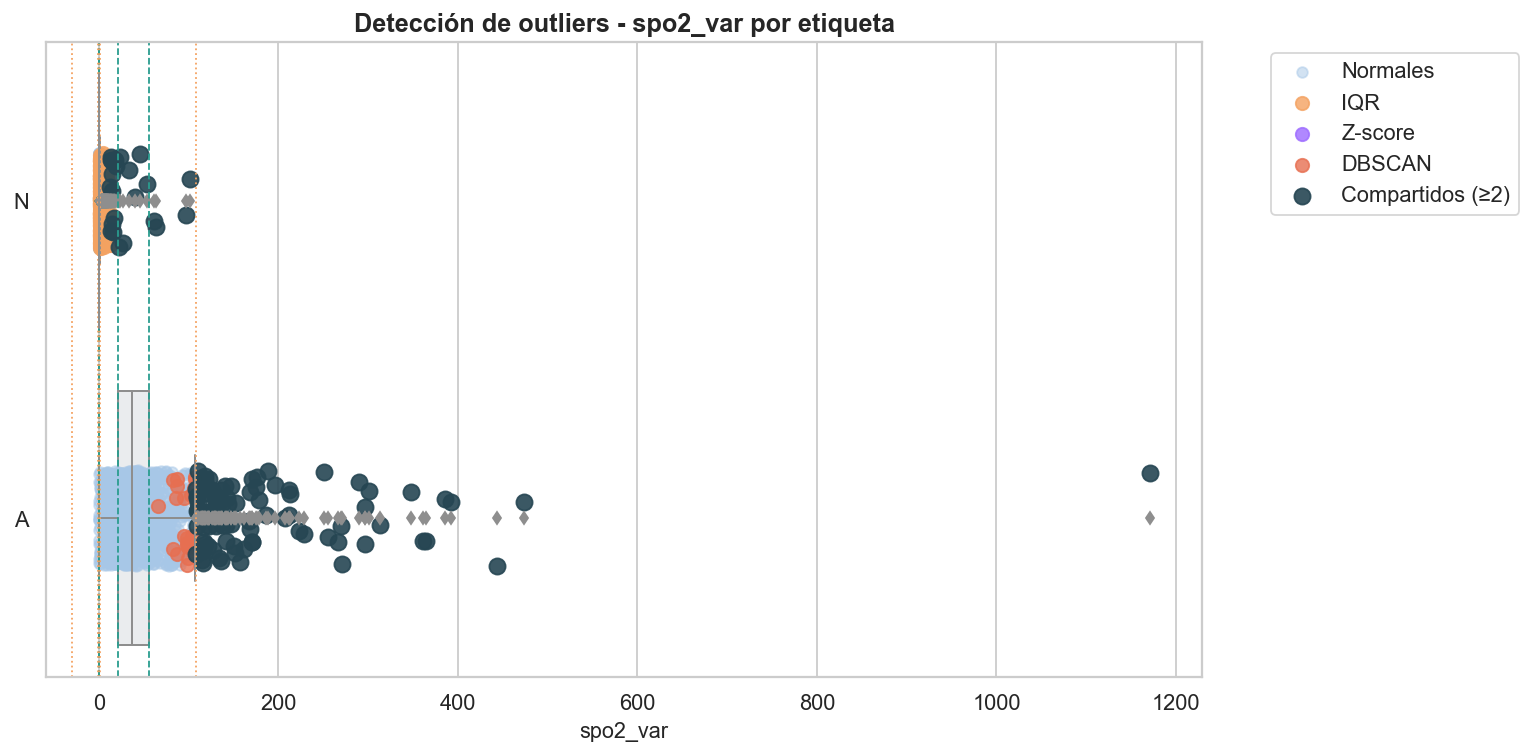


🔹 Variable: spo2_std | Etiqueta: N
 - Outliers IQR: 256 | Limite inferior: -0.103, Limite superior: 1.166
 - Outliers Z-score: 50
 - Outliers DBSCAN: 10
 - Compartidos (≥2 métodos): 50

🔹 Variable: spo2_std | Etiqueta: A
 - Outliers IQR: 48 | Limite inferior: 0.401, Limite superior: 11.75
 - Outliers Z-score: 21
 - Outliers DBSCAN: 8
 - Compartidos (≥2 métodos): 21


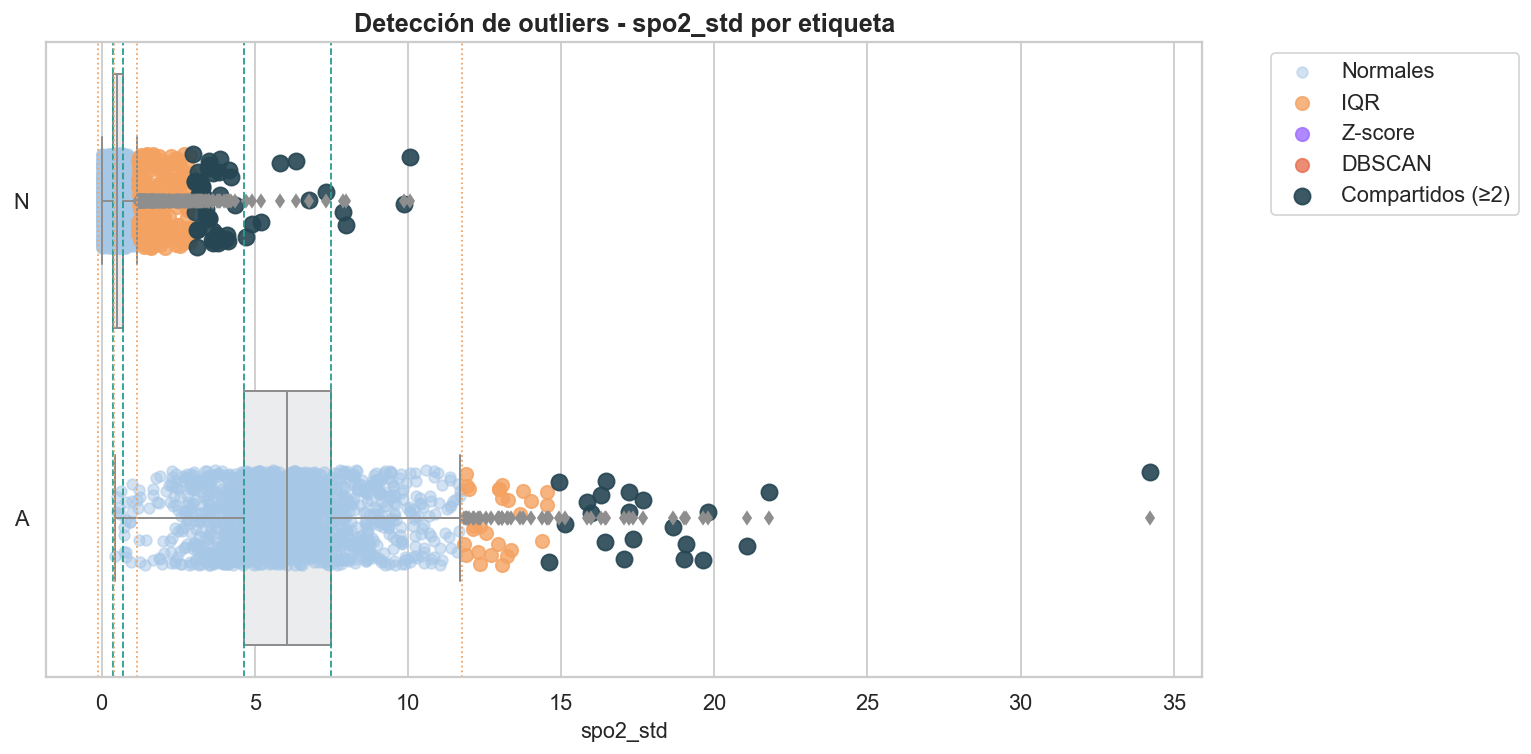


🔹 Variable: spo2_mean | Etiqueta: N
 - Outliers IQR: 356 | Limite inferior: 93.178, Limite superior: 97.374
 - Outliers Z-score: 40
 - Outliers DBSCAN: 5
 - Compartidos (≥2 métodos): 41

🔹 Variable: spo2_mean | Etiqueta: A
 - Outliers IQR: 35 | Limite inferior: 71.234, Limite superior: 101.867
 - Outliers Z-score: 16
 - Outliers DBSCAN: 16
 - Compartidos (≥2 métodos): 16


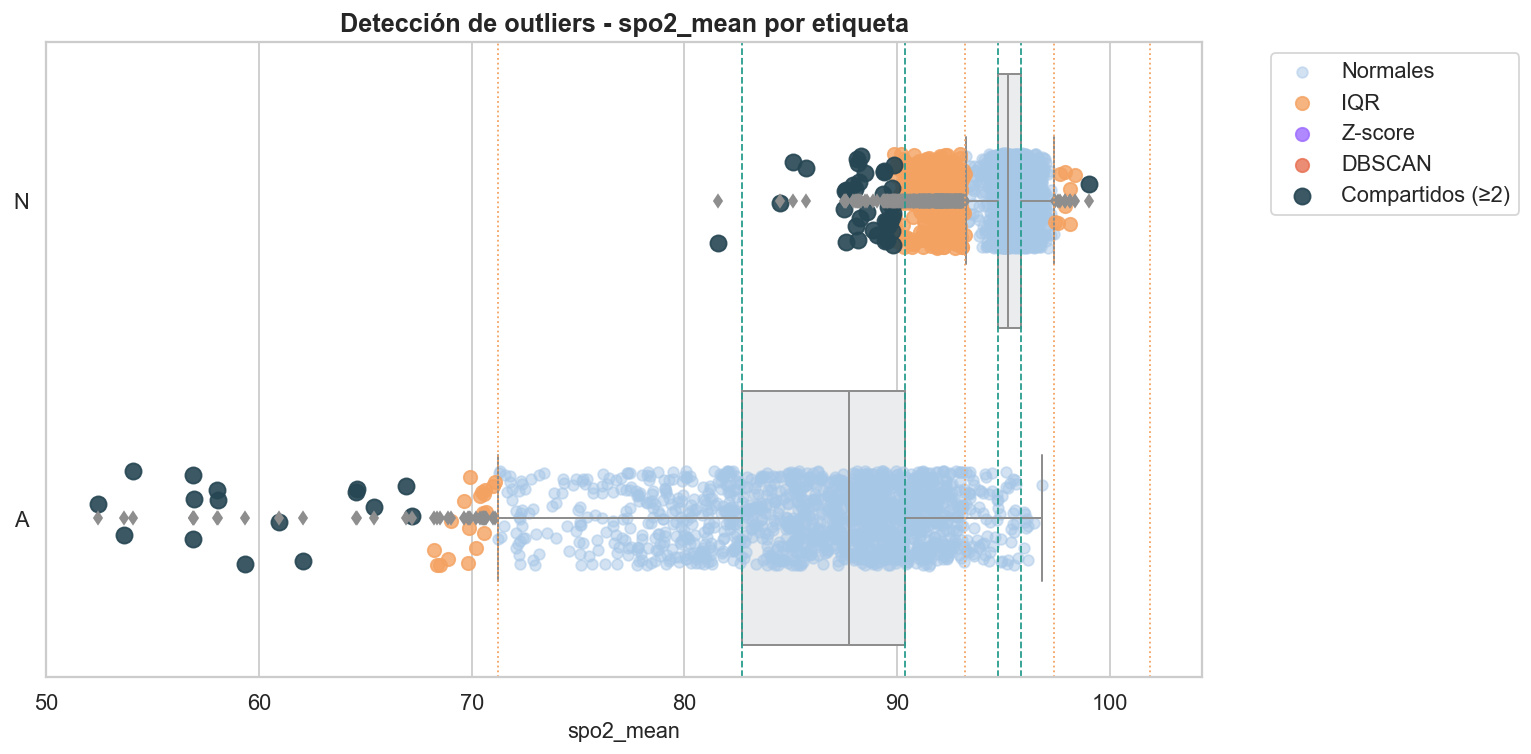

In [42]:
features = ['spo2_min','spo2_max','spo2_var','spo2_std','spo2_mean'] 
detectar_outliers_por_etiqueta(df, features, eps=0.5, min_samples=5)

#### ***Análisis***

La detección de valores atípicos en las características derivadas de la señal de saturación de oxígeno (SpO₂) permitió identificar diferencias relevantes entre las épocas normales y aquellas con eventos de apnea. En general, el método basado en el rango intercuartílico (IQR) mostró la mayor sensibilidad para detectar registros extremos, mientras que los métodos Z-score y DBSCAN resultaron más selectivos, concentrándose en los valores de mayor desviación o aislamiento. La combinación de estos métodos permite identificar de manera robusta los registros más atípicos de la señal.

En la variable spo2_min se observó la diferencia más marcada entre condiciones. Durante las épocas normales (N) se detectaron 15 valores atípicos compartidos por los tres métodos, mientras que en las épocas con apnea (A) se identificaron 49 registros con coincidencia entre métodos. Además, en N se registraron 6 valores de SpO₂ inferiores al 70 %, frente a 309 en A. Considerando que los dispositivos de oximetría son precisos principalmente en el rango 70–100 %, estos valores probablemente corresponden a artefactos derivados de pérdida de señal o movimiento del sensor, fenómenos más frecuentes durante los episodios obstructivos.

En la variable spo2_max, la figura muestra que tanto en las épocas normales (N) como en las de apnea (A) los valores se concentran en rangos muy definidos, lo que refleja una dispersión reducida y una tendencia a agruparse en intervalos específicos de saturación máxima. Los registros atípicos detectados por al menos dos métodos fueron 62 en épocas normales y 35 en épocas de apnea, representando mediciones que se alejan de los patrones centrales y que podrían corresponder a picos fisiológicos o mediciones atípicas.

En spo2_mean, se identificaron 41 outliers en épocas normales y 16 en épocas de apnea con coincidencia entre al menos dos métodos. Durante los eventos apneicos, los registros atípicos se alejan más del rango típico, reflejando descensos marcados de la saturación promedio.

En la variable spo2_var, durante las épocas sin eventos de apnea, el método del rango intercuartílico (IQR) identificó 303 registros como outliers, de los cuales 26 fueron detectados por al menos dos de los tres métodos implementados (IQR, Z-score o DBSCAN). En las épocas de apnea, el IQR detectó 92 outliers, todos coincidentes con al menos dos métodos. Los límites IQR fueron –0.367 y 0.98 en las épocas normales, y –30.03 y 107.87 durante las apneas, reflejando que los eventos respiratorios generan cambios extremos en la amplitud de la señal.

En la variable spo2_std, que refleja la variabilidad de la saturación de oxígeno, durante las épocas normales (N) se detectaron 256 outliers mediante el método del rango intercuartílico (IQR), de los cuales 50 fueron identificados por al menos dos de los tres métodos implementados (IQR, Z-score o DBSCAN). Durante las épocas de apnea (A), el IQR detectó 48 outliers, con 21 registros coincidentes en al menos dos métodos. Los límites IQR fueron –0.103 y 1.166 en las épocas normales, y 0.401 y 11.750 durante las apneas, evidenciando fluctuaciones más pronunciadas durante los eventos de apnea.

En términos fisiológicos, los outliers representan registros que se alejan de los patrones esperados y que pueden corresponder tanto a fenómenos reales —como descensos y recuperaciones rápidas de oxígeno durante apneas— como a artefactos de medición. En general, se recomienda conservar aquellos registros que reflejan fluctuaciones fisiológicas dentro de rangos plausibles, ya que aportan información relevante sobre la dinámica de la saturación de oxígeno. No obstante, los valores inferiores al 70 %, que se encuentran fuera del rango esperado en personas dormidas, deben verificarse y eliminarse del análisis, especialmente aquellos registros extremadamente bajos, como los cercanos a 1 %.



### <span style="color:#1a73e8;"><strong>FLUJO</strong></span>


🔹 Variable: airflow_mean | Etiqueta: N
 - Outliers IQR: 433 | Limite inferior: -0.07, Limite superior: -0.011
 - Outliers Z-score: 8
 - Outliers DBSCAN: 0
 - Compartidos (≥2 métodos): 8

🔹 Variable: airflow_mean | Etiqueta: A
 - Outliers IQR: 31 | Limite inferior: -0.048, Limite superior: 0.124
 - Outliers Z-score: 4
 - Outliers DBSCAN: 0
 - Compartidos (≥2 métodos): 4


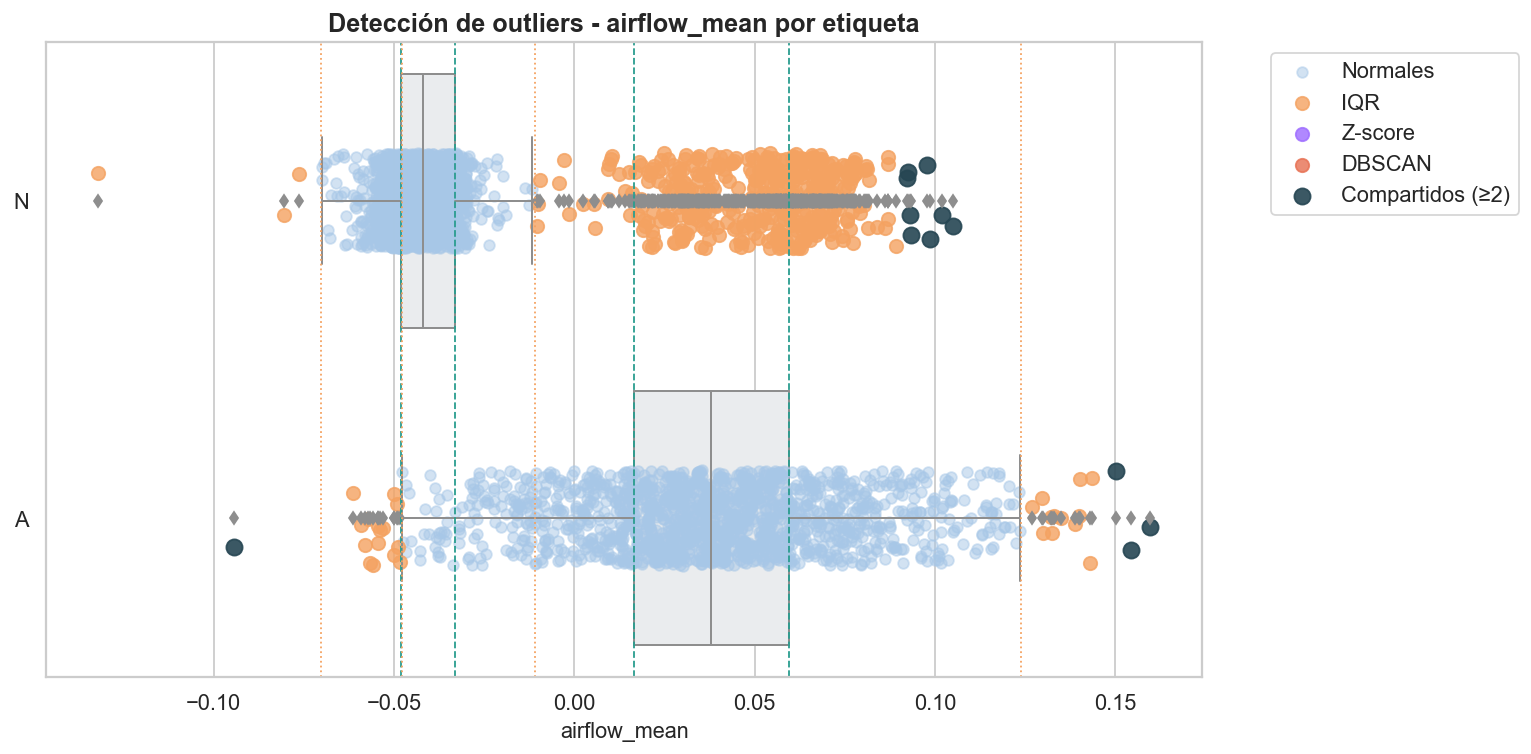


🔹 Variable: airflow_median | Etiqueta: N
 - Outliers IQR: 364 | Limite inferior: -0.191, Limite superior: 0.058
 - Outliers Z-score: 11
 - Outliers DBSCAN: 0
 - Compartidos (≥2 métodos): 11

🔹 Variable: airflow_median | Etiqueta: A
 - Outliers IQR: 70 | Limite inferior: -0.04, Limite superior: 0.217
 - Outliers Z-score: 13
 - Outliers DBSCAN: 0
 - Compartidos (≥2 métodos): 13


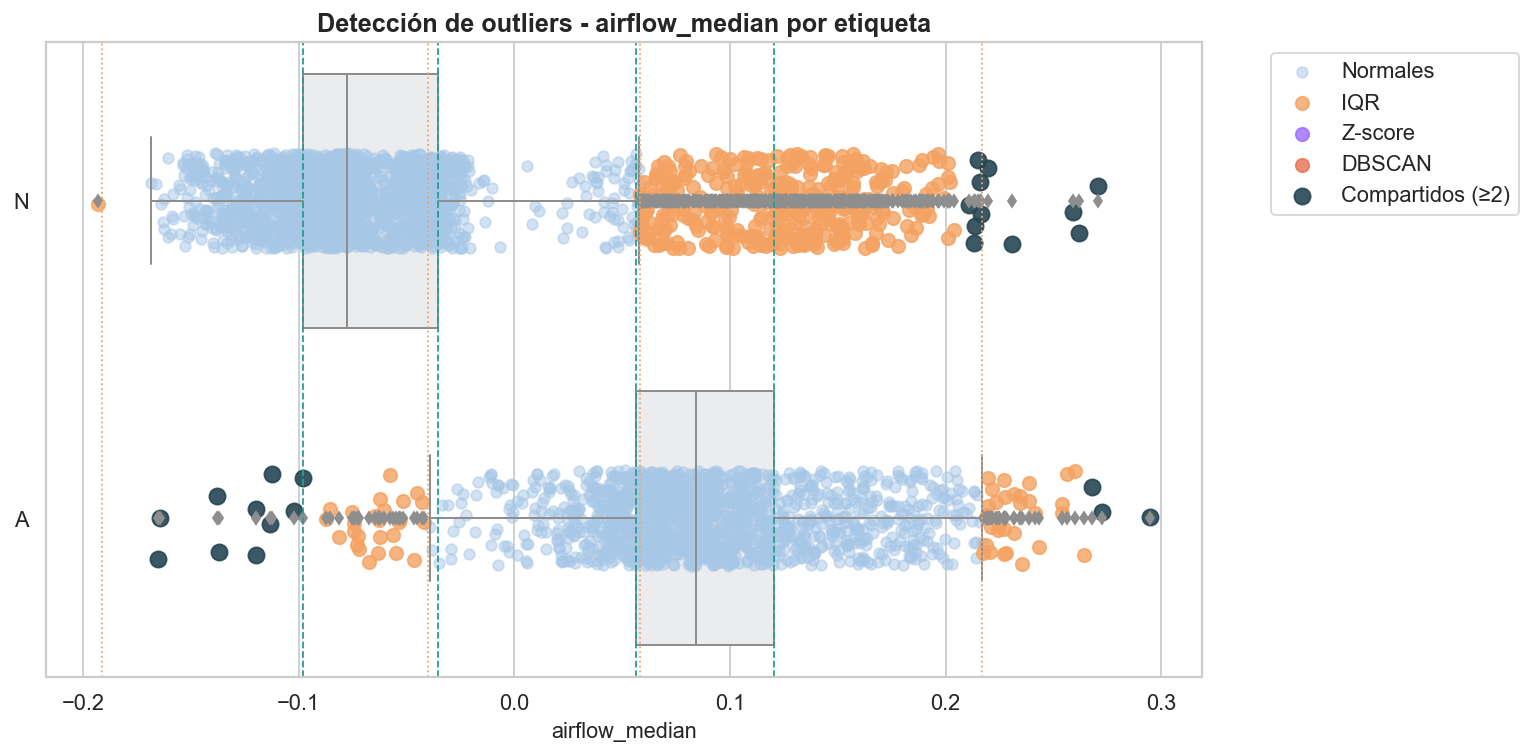


🔹 Variable: airflow_std | Etiqueta: N
 - Outliers IQR: 20 | Limite inferior: -0.052, Limite superior: 0.372
 - Outliers Z-score: 19
 - Outliers DBSCAN: 0
 - Compartidos (≥2 métodos): 19

🔹 Variable: airflow_std | Etiqueta: A
 - Outliers IQR: 5 | Limite inferior: 0.026, Limite superior: 0.509
 - Outliers Z-score: 0
 - Outliers DBSCAN: 0
 - Compartidos (≥2 métodos): 0


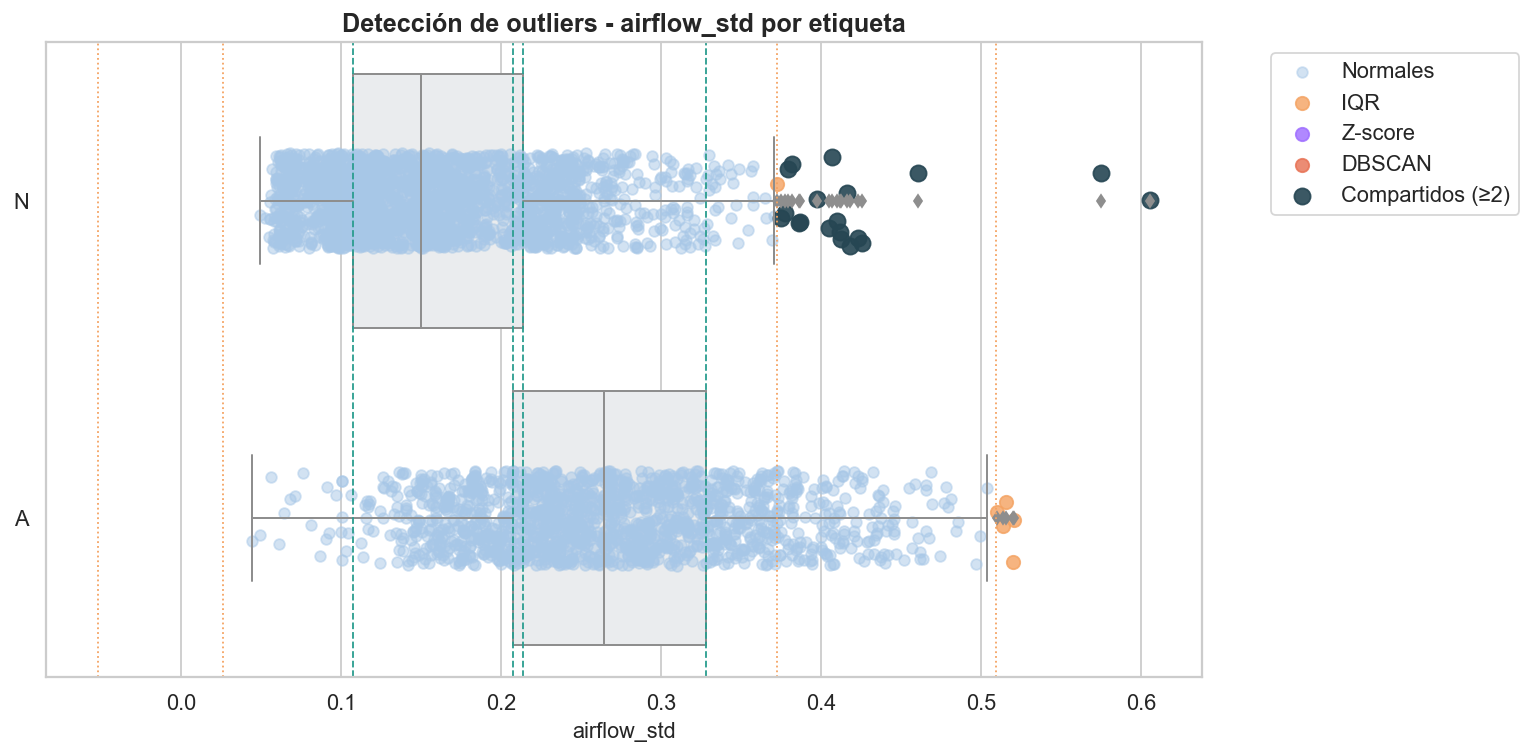


🔹 Variable: airflow_mean_PSD_0_0.1 | Etiqueta: N
 - Outliers IQR: 325 | Limite inferior: -0.017, Limite superior: 0.037
 - Outliers Z-score: 68
 - Outliers DBSCAN: 0
 - Compartidos (≥2 métodos): 68

🔹 Variable: airflow_mean_PSD_0_0.1 | Etiqueta: A
 - Outliers IQR: 68 | Limite inferior: -0.043, Limite superior: 0.147
 - Outliers Z-score: 22
 - Outliers DBSCAN: 0
 - Compartidos (≥2 métodos): 22


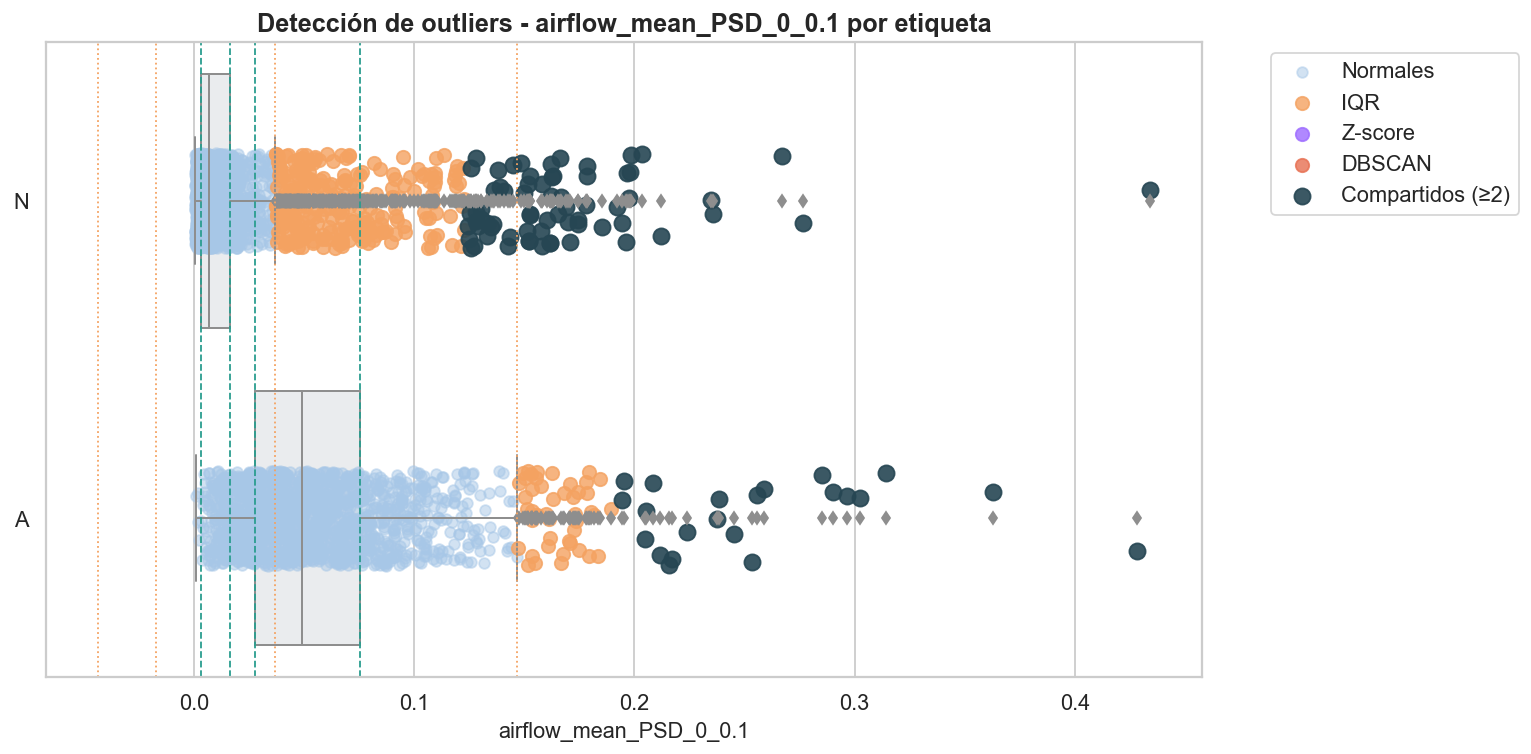


🔹 Variable: airflow_mean_PSD_0.4_0.5 | Etiqueta: N
 - Outliers IQR: 162 | Limite inferior: -0.015, Limite superior: 0.034
 - Outliers Z-score: 29
 - Outliers DBSCAN: 0
 - Compartidos (≥2 métodos): 29

🔹 Variable: airflow_mean_PSD_0.4_0.5 | Etiqueta: A
 - Outliers IQR: 115 | Limite inferior: -0.09, Limite superior: 0.195
 - Outliers Z-score: 33
 - Outliers DBSCAN: 0
 - Compartidos (≥2 métodos): 33


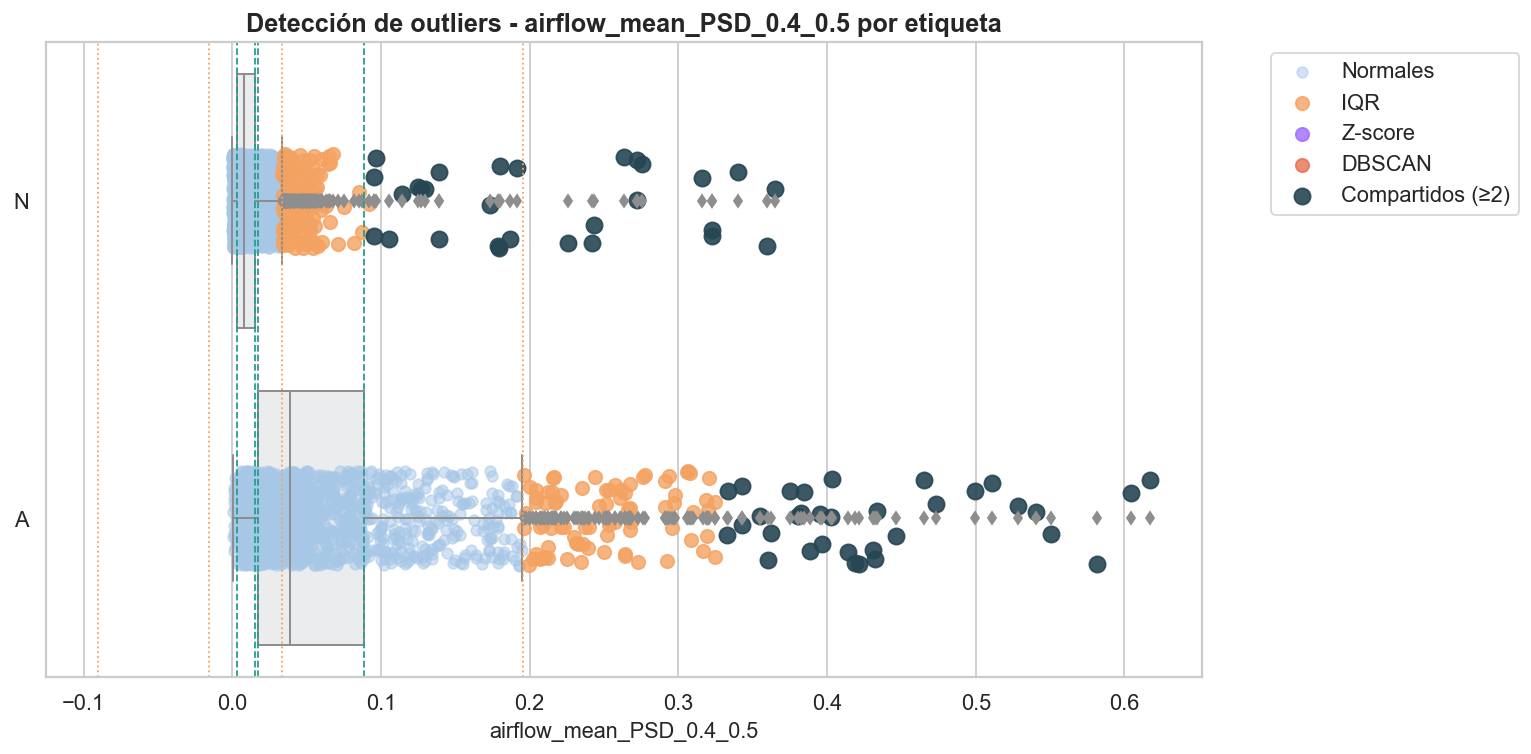

In [43]:
features = ['airflow_mean','airflow_median','airflow_std','airflow_mean_PSD_0_0.1','airflow_mean_PSD_0.4_0.5']  
detectar_outliers_por_etiqueta(df, features, eps=0.5, min_samples=5)

#### ***Análisis***

En las características derivadas de la señal de flujo respiratorio, la detección de valores atípicos se centró en los registros identificados por al menos dos de los tres métodos implementados (IQR, Z-score y DBSCAN), con el objetivo de analizar los casos más consistentes de valores fuera de los límites esperados.

En la característica de promedio, el método IQR detectó 433 registros fuera de los límites durante las épocas sin eventos, de los cuales 8 coincidieron con el método Z-score. En las épocas con apnea, se detectaron 31 registros fuera de los límites IQR, de los cuales 4 fueron compartidos por múltiples métodos, reflejando un aumento relativo de fluctuaciones en la señal durante los eventos apneicos.

Para la mediana, durante las épocas sin eventos se identificaron 364 registros fuera de los límites IQR, con 11 coincidencias entre métodos. Durante las apneas, se detectaron 70 registros fuera de los límites IQR, de los cuales 13 coincidieron entre IQR y Z-score, evidenciando que los eventos apneicos pueden generar valores más extremos en la mediana del flujo respiratorio.

En la desviación estándar, los límites IQR detectaron 20 valores atípicos durante las épocas sin eventos, de los cuales 19 coincidieron con Z-score. Durante las apneas, el IQR detectó 5 registros fuera de los límites, sin coincidencias con otros métodos, indicando que los cambios bruscos en la variabilidad de la señal son poco frecuentes pero presentes durante los eventos.

En las características frecuenciales, para mean_psd_0_0.1, el IQR detectó 325 registros fuera de los límites durante épocas normales, con 68 coincidencias con Z-score. En las apneas, se detectaron 68 registros fuera de los límites IQR, de los cuales 22 coincidieron con Z-score, siendo el valor más extremo superior a 0.4. Para mean_psd_0.4_0.5, en épocas normales se identificaron 162 registros fuera de los límites IQR, con 29 coincidencias con Z-score. Durante las apneas, se detectaron 115 registros fuera de los límites, de los cuales 33 coincidieron con Z-score, siendo el valor más extremo superior a 0.6.

En general, los outliers analizados corresponden a registros que coinciden entre métodos, dado que DBSCAN no presentó detección significativa para estas características; se consideraron los identificados mediante IQR y Z-score. No se detectaron registros extremadamente atípicos que comprometan la señal, por lo que estos valores se conservan en el análisis, ya que pueden proporcionar información relevante sobre la dinámica del flujo respiratorio, particularmente en relación con las fluctuaciones asociadas a los eventos apneicos.


## <span style="color:#1a73e8;"><strong>Conclusiones</strong></span>

- El análisis de la base de datos Apnea-ECG evidencia que las métricas temporales y frecuenciales extraídas del ECG, la saturación de oxígeno (SpO₂) y el flujo respiratorio reflejan adecuadamente los patrones fisiológicos asociados a la apnea del sueño. En particular, las épocas con eventos respiratorios muestran desaturaciones transitorias de oxígeno, caracterizadas por disminuciones en spo2_min y spo2_mean y aumentos en spo2_std y spo2_var, mientras que la señal de flujo respiratorio presenta medianas cercanas a cero y mayor variabilidad. Estos hallazgos confirman la capacidad de las métricas extraídas para diferenciar, en términos generales, entre épocas con y sin apnea.

- Se identificaron valores atípicos compartidos en varias métricas, tanto en épocas con como sin apnea, que exceden los rangos fisiológicos esperables. Entre ellos, algunas características derivadas de los intervalos RR y de la variabilidad cardíaca (por ejemplo, RMSSD, std_rr, var_rr) superan los límites típicos, mientras que ciertos registros de SpO₂ muestran desaturaciones inferiores al 70%, fuera del rango confiable de medición. Estos valores representan artefactos o mediciones no fisiológicas y deben considerarse para depuración. Además, se observó alta correlación entre variables relacionadas (RMSSD y std_rr: ρ = 0.98; airflow_mean y airflow_median: ρ = 0.90; spo2_std y spo2_var: ρ = 1.0), evidenciando redundancia y sugiriendo la necesidad de seleccionar las características más representativas.

- A pesar de que los resultados reflejan patrones fisiológicos consistentes, la muestra presenta un sesgo de género marcado (7 hombres y 1 mujer), lo que limita la generalización de los hallazgos a poblaciones más amplias y heterogéneas





## <span style="color:#1a73e8;"><strong>Referencias</strong></span>

[1]	T. Penzel, G. B. Moody, R. G. Mark, A. L. Goldberger, y J. H. Peter, «Apnea-ECG Database». physionet.org, 2000. doi: 10.13026/C23W2R.

[2]	D. Valecchi et al., «Prognostic Significance of Obstructive Sleep Apnea in a Population of Subjects with Interstitial Lung Diseases», Pulm. Ther., vol. 9, n.o 2, pp. 223-236, feb. 2023, doi: 10.1007/s41030-023-00215-1.

[3]	T. Wang, C. Lu, y G. Shen, «Detection of Sleep Apnea from Single-Lead ECG Signal Using a Time Window Artificial Neural Network», BioMed Res. Int., vol. 2019, p. 9768072, dic. 2019, doi: 10.1155/2019/9768072.

[4]	M. P. Ayalew, H. D. Nemomssa, y G. L. Simegn, «Sleep apnea syndrome detection and classification of severity level from ECG and SpO2 signals», Health Technol., vol. 5, n.o 0, nov. 2021, doi: 10.21037/ht-21-18.

[5]	X. Li, S. Ling, y S. Su, «A Hybrid Feature Selection and Extraction Methods for Sleep Apnea Detection Using Bio-Signals», Sensors, vol. 20, p. 4323, ago. 2020, doi: 10.3390/s20154323.

[6]	K. Narkiewicz, N. Montano, C. Cogliati, P. J. H. van de Borne, M. E. Dyken, y V. K. Somers, «Altered Cardiovascular Variability in Obstructive Sleep Apnea», Circulation, vol. 98, n.o 11, pp. 1071-1077, sep. 1998, doi: 10.1161/01.CIR.98.11.1071.

[7]	N. H. Hoang y Z. Liang, «Detection and Severity Classification of Sleep Apnea Using Continuous Wearable SpO2 Signals: A Multi-Scale Feature Approach», Sensors, vol. 25, n.o 6, p. 1698, ene. 2025, doi: 10.3390/s25061698.

[8]	K. D. Torp, P. Modi, E. J. Pollard, y L. V. Simon, «Pulse Oximetry», en StatPearls, Treasure Island (FL): StatPearls Publishing, 2025. Accedido: 6 de octubre de 2025. [En línea]. Disponible en: http://www.ncbi.nlm.nih.gov/books/NBK470348/

[9]	T. Lyu et al., «Assessment of the long RR intervals using convolutional neural networks in single-lead long-term Holter electrocardiogram recordings», Sci. Rep., vol. 15, n.o 1, p. 11912, abr. 2025, doi: 10.1038/s41598-025-96622-2.

[10]	«Understanding HRV Metrics: Key Differences Between SDNN and RMSSD». Accedido: 13 de octubre de 2025. [En línea]. Disponible en: https://www.spikeapi.com/blog/understanding-hrv-metrics-a-deep-dive-into-sdnn-and-rmssd

[11]	E. Vanoli, P. B. Adamson, Ba-Lin, G. D. Pinna, R. Lazzara, y W. C. Orr, «Heart Rate Variability During Specific Sleep Stages», Circulation, vol. 91, n.o 7, pp. 1918-1922, abr. 1995, doi: 10.1161/01.CIR.91.7.1918.

